In [90]:
import json
import pandas as pd

file_path = r"C:\Users\navee\OneDrive\Desktop\Clustering\file1.json"
with open(file_path, 'r') as file:
    data = json.load(file)

restaurants_data = []
for entry in data:
    if 'restaurants' in entry:
        for restaurant_entry in entry['restaurants']:
            restaurants_data.append(restaurant_entry['restaurant'])

print(f"Total restaurants found: {len(restaurants_data)}")

def extract_relevant_data(restaurant):
    """
    Extracts and flattens relevant restaurant data, including new fields.
    """
    flattened = {
        "Name": restaurant.get("name"),
        "Cuisines": ", ".join([cuisine.strip() for cuisine in restaurant.get("cuisines", "").split(",")]),  
        "Average_cost_for_two": restaurant.get("average_cost_for_two"),
        "Price_range": restaurant.get("price_range"),
        "Currency": restaurant.get("currency"),
        "Url": restaurant.get("url"),
        "Featured_image": restaurant.get("featured_image"),
        "Address": restaurant.get("location", {}).get("address"),
        "Locality": restaurant.get("location", {}).get("locality"),
        "City": restaurant.get("location", {}).get("city"),
        "Latitude": restaurant.get("location", {}).get("latitude"),
        "Longitude": restaurant.get("location", {}).get("longitude"),
        "Aggregate_rating": restaurant.get("user_rating", {}).get("aggregate_rating"),
        "Rating_text": restaurant.get("user_rating", {}).get("rating_text"),
        "Votes": restaurant.get("user_rating", {}).get("votes"),
        "Events": "; ".join(
            [
                event.get("event", {}).get("title", "")
                for event in restaurant.get("zomato_events", [])
            ]
        ),
        "Has_online_delivery": restaurant.get("has_online_delivery"),
        "Photos_url": restaurant.get("photos_url"),
        "Apikey": restaurant.get("apikey"),
        "Rating_color": restaurant.get("user_rating", {}).get("rating_color"),
        "Has_table_booking": restaurant.get("has_table_booking"),
        "Deeplink": restaurant.get("deeplink"),
        "Menu_url": restaurant.get("menu_url"),
        "Country_id": restaurant.get("location", {}).get("country_id"),
        "Locality_verbose": restaurant.get("location", {}).get("locality_verbose"),
        "City_id": restaurant.get("location", {}).get("city_id"),
        "Zipcode": restaurant.get("location", {}).get("zipcode"),
        "Restaurant_id": restaurant.get("id"),
        "Restaurant_thumb": restaurant.get("thumb"),
        "Book_url": restaurant.get("book_url"),
    }
    return flattened

flattened_data = [extract_relevant_data(restaurant) for restaurant in restaurants_data]
df_1 = pd.DataFrame(flattened_data)

df_1.columns = [col.capitalize() for col in df_1.columns]

print(f"Total rows in the DataFrame: {len(df_1)}")
print(df_1.head())


Total restaurants found: 1180
Total rows in the DataFrame: 1180
                         Name  \
0            Hauz Khas Social   
1  Qubitos - The Terrace Cafe   
2             The Hudson Cafe   
3           Summer House Cafe   
4                 38 Barracks   

                                            Cuisines  Average_cost_for_two  \
0         Continental, American, Asian, North Indian                  1600   
1  Thai, European, Mexican, North Indian, Chinese...                  1500   
2                Cafe, Italian, Continental, Chinese                   850   
3                               Italian, Continental                  1850   
4             North Indian, Italian, Asian, American                  1600   

   Price_range Currency                                                Url  \
0            3      Rs.  https://www.zomato.com/HauzKhasSocial?utm_sour...   
1            3      Rs.  https://www.zomato.com/ncr/qubitos-the-terrace...   
2            2      Rs.  https://w

In [91]:
pd.set_option('display.max_columns', None)
df_1

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Rs.,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,New Delhi,28.5542851000,77.1944706000,4.3,Very Good,7931,IPL Match Screenings,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/308322,https://www.zomato.com/HauzKhasSocial/menu?utm...,1,"Hauz Khas Village, New Delhi",1,,308322,https://b.zmtcdn.com/data/pictures/2/308322/cf...,https://www.zomato.com/HauzKhasSocial/book?utm...
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Rs.,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,New Delhi,28.6471325000,77.1177015000,4.5,Excellent,778,Live Fusion Night with Suboni Brothers; Raenit...,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,zomato://restaurant/18037817,https://www.zomato.com/ncr/qubitos-the-terrace...,1,"Rajouri Garden, New Delhi",1,,18037817,https://b.zmtcdn.com/data/pictures/7/18037817/...,https://www.zomato.com/ncr/qubitos-the-terrace...
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Rs.,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1537,,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/312345,https://www.zomato.com/ncr/the-hudson-cafe-del...,1,"Delhi University-GTB Nagar, New Delhi",1,,312345,https://b.zmtcdn.com/data/pictures/5/312345/03...,None
3,Summer House Cafe,"Italian, Continental",1850,3,Rs.,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,New Delhi,28.5525204000,77.2038090000,4.1,Very Good,1823,SALSA NIGHT; Karaoke Night; COMEDY NIGHT; Boxo...,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/307490,https://www.zomato.com/ncr/summer-house-cafe-h...,1,"Hauz Khas, New Delhi",1,110016,307490,https://b.zmtcdn.com/data/pictures/0/307490/e0...,https://www.zomato.com/ncr/summer-house-cafe-h...
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Rs.,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,New Delhi,28.6330248887,77.2228584811,4.4,Very Good,840,,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/18241537,https://www.zomato.com/ncr/38-barracks-connaug...,1,"Connaught Place, New Delhi",1,,18241537,https://b.zmtcdn.com/data/pictures/7/18241537/...,https://www.zomato.com/ncr/38-barracks-connaug...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,The Boozy Cow,"Burger, Grill",40,3,£,https://www.zomato.com/edinburgh/the-boozy-cow...,https://b.zmtcdn.com/data/pictures/0/7602340/0...,"17 Frederick Street, New Town, Edinburgh EH2 2EY",New Town,Edinburgh,55.9519740000,-3.1995690000,4.0,Very Good,36,,0,https://www.zomato.com/edinburgh/the-boozy-cow...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/7602340,https://www.zomato.com/edinburgh/the-boo

In [92]:
import json
import pandas as pd

file_path = r"C:\Users\navee\OneDrive\Desktop\Clustering\file2.json"
with open(file_path, 'r') as file:
    data = json.load(file)

restaurants_data = []
for entry in data:
    if 'restaurants' in entry:
        for restaurant_entry in entry['restaurants']:
            restaurants_data.append(restaurant_entry['restaurant'])

print(f"Total restaurants found: {len(restaurants_data)}")

def extract_relevant_data(restaurant):
    """
    Extracts and flattens relevant restaurant data, including new fields.
    """
    flattened = {
        "Name": restaurant.get("name"),
        "Cuisines": ", ".join([cuisine.strip() for cuisine in restaurant.get("cuisines", "").split(",")]),  # Join cuisines as a string
        "Average_cost_for_two": restaurant.get("average_cost_for_two"),
        "Price_range": restaurant.get("price_range"),
        "Currency": restaurant.get("currency"),
        "Url": restaurant.get("url"),
        "Featured_image": restaurant.get("featured_image"),
        "Address": restaurant.get("location", {}).get("address"),
        "Locality": restaurant.get("location", {}).get("locality"),
        "City": restaurant.get("location", {}).get("city"),
        "Latitude": restaurant.get("location", {}).get("latitude"),
        "Longitude": restaurant.get("location", {}).get("longitude"),
        "Aggregate_rating": restaurant.get("user_rating", {}).get("aggregate_rating"),
        "Rating_text": restaurant.get("user_rating", {}).get("rating_text"),
        "Votes": restaurant.get("user_rating", {}).get("votes"),
        "Events": "; ".join(
            [
                event.get("event", {}).get("title", "")
                for event in restaurant.get("zomato_events", [])
            ]
        ),
        "Has_online_delivery": restaurant.get("has_online_delivery"),
        "Photos_url": restaurant.get("photos_url"),
        "Apikey": restaurant.get("apikey"),
        "Rating_color": restaurant.get("user_rating", {}).get("rating_color"),
        "Has_table_booking": restaurant.get("has_table_booking"),
        "Deeplink": restaurant.get("deeplink"),
        "Menu_url": restaurant.get("menu_url"),
        "Country_id": restaurant.get("location", {}).get("country_id"),
        "Locality_verbose": restaurant.get("location", {}).get("locality_verbose"),
        "City_id": restaurant.get("location", {}).get("city_id"),
        "Zipcode": restaurant.get("location", {}).get("zipcode"),
        "Restaurant_id": restaurant.get("id"),
        "Restaurant_thumb": restaurant.get("thumb"),
        "Book_url": restaurant.get("book_url"),
    }
    return flattened

flattened_data = [extract_relevant_data(restaurant) for restaurant in restaurants_data]
df_2 = pd.DataFrame(flattened_data)

df_2.columns = [col.capitalize() for col in df_1.columns]

print(f"Total rows in the DataFrame: {len(df_1)}")
print(df_2.head())


Total restaurants found: 10602
Total rows in the DataFrame: 1180
                      Name                              Cuisines  \
0            Arigato Sushi                                 Asian   
1                    Mocha            Cafe, Italian, Continental   
2          Blue House Cafe         Coffee and Tea, Mediterranean   
3              Star Buffet                                 Asian   
4  11th Avenue Cafe Bistro  Cafe, American, Italian, Continental   

   Average_cost_for_two  Price_range Currency  \
0                    25            2        $   
1                   800            3      Rs.   
2                    10            1        $   
3                    20            2        $   
4                   400            2      Rs.   

                                                 Url  \
0  https://www.zomato.com/yorkton-sk/arigato-sush...   
1  https://www.zomato.com/lucknow/mocha-gomti-nag...   
2  https://www.zomato.com/vernonia-or/blue-house-...   
3  http

In [93]:
df_2

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,Arigato Sushi,Asian,25,2,$,https://www.zomato.com/yorkton-sk/arigato-sush...,,"14 Second Ave North, Yorkton, SK S3N 1G1",Yorkton,Yorkton,51.2106824000,-102.4613173000,3.3,Average,26,,0,https://www.zomato.com/yorkton-sk/arigato-sush...,10a35f36f5898432823df42bc743c8aa,CDD614,0,zomato://restaurant/16668008,https://www.zomato.com/yorkton-sk/arigato-sush...,37,"Yorkton, Yorkton",3600,S3N 1G1,16668008,,None
1,Mocha,"Cafe, Italian, Continental",800,3,Rs.,https://www.zomato.com/lucknow/mocha-gomti-nag...,https://b.zmtcdn.com/data/pictures/0/801690/fa...,"CP-1, 2nd Floor, Anand Plaza, Viram Khand-1, N...",Gomti Nagar,Lucknow,26.8528099000,81.0011849000,4.6,Excellent,567,,0,https://www.zomato.com/lucknow/mocha-gomti-nag...,10a35f36f5898432823df42bc743c8aa,3F7E00,0,zomato://restaurant/801690,https://www.zomato.com/lucknow/mocha-gomti-nag...,1,"Gomti Nagar, Lucknow",8,226010,801690,https://b.zmtcdn.com/data/pictures/0/801690/fa...,None
2,Blue House Cafe,"Coffee and Tea, Mediterranean",10,1,$,https://www.zomato.com/vernonia-or/blue-house-...,,"919 Bridge St, Vernonia, OR 97064",Vernonia,Vernonia,45.8586670000,-123.1954368000,4.3,Very Good,88,,0,https://www.zomato.com/vernonia-or/blue-house-...,10a35f36f5898432823df42bc743c8aa,5BA829,0,zomato://restaurant/17558738,https://www.zomato.com/vernonia-or/blue-house-...,216,"Vernonia, Vernonia",8351,97064,17558738,,None
3,Star Buffet,Asian,20,2,$,https://www.zomato.com/mayfield-nsw/star-buffe...,,"58 Hanbury St, Mayfield, NSW",Mayfield,Mayfield,-32.8991780000,151.7343832000,2.9,Average,11,,0,https://www.zomato.com/mayfield-nsw/star-buffe...,10a35f36f5898432823df42bc743c8aa,FFBA00,0,zomato://restaurant/16611701,https://www.zomato.com/mayfield-nsw/star-buffe...,14,"Mayfield, Mayfield",2249,2304,16611701,,None
4,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",400,2,Rs.,https://www.zomato.com/guwahati/11th-avenue-ca...,https://b.zmtcdn.com/data/pictures/4/2100784/8...,"Opposite Assam State Museum, Dighalipukhuri, T...",Uzan Bazaar,Guwahati,26.1860014826,91.7523143068,4.1,Very Good,377,,0,https://www.zomato.com/guwahati/11th-avenue-ca...,10a35f36f5898432823df42bc743c8aa,5BA829,0,zomato://restaurant/2100784,https://www.zomato.com/guwahati/11th-avenue-ca...,1,"Uzan Bazaar, Guwahati",21,,2100784,https://b.zmtcdn.com/data/pictures/4/2100784/8...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,Cyber Hub Social,"Continental, American, Asian, North Indian",1500,3,Rs.,https://www.zomato.com/CyberHubSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/chains/2/30...,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City",Gurgaon,28.4939356000,77.0885080000,4.3,Very Good,716,IPL Match Screenings,1,https://www.zomato.com/CyberHubSocial/photos?u...,10a35f36f5898432823df42bc743c8aa,5BA829,1,zomato://restaurant/18289242,https://www.zomato.com/CyberHubSocial/menu?utm...,1,"Cyber Hub, DLF Cyber City, Gurgaon",1,,18289242,https://b.zmtcdn.com/data/pictures/chains/2/30...,https://www.zomato.com/CyberHubSocial/book?utm...
10598,Gulati,"North Indian, Mughlai",1500,3,Rs.,https://www.zomato.com/ncr/gulati-pandara-road...,https://b.zmtcdn.com/data/pictures/9/799/2a39a...,"6, Pandara Road Market, New Delhi",Pandara Road Market,New Delhi,28.6081402000,77.2297330000,4.4,Very Good,4373,,1,https://www.zomato.com/ncr/gulati-pandara-road...,10a35f36f5898432823df42bc743c8aa,5BA829,0,zomato://restaurant/799,https://www.zomato.com/ncr/gulati-pandara-road...,1,"Pandara Road Market, New Delhi",1,0,799,https://b.zmtcdn.com/data/pictures/9/799/2a39a...,None
10599,Punjab Grill,North Indian,1600,3,Rs.,ht

In [94]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10602 entries, 0 to 10601
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  10602 non-null  object
 1   Cuisines              10602 non-null  object
 2   Average_cost_for_two  10602 non-null  int64 
 3   Price_range           10602 non-null  int64 
 4   Currency              10602 non-null  object
 5   Url                   10602 non-null  object
 6   Featured_image        10602 non-null  object
 7   Address               10602 non-null  object
 8   Locality              10602 non-null  object
 9   City                  10602 non-null  object
 10  Latitude              10602 non-null  object
 11  Longitude             10602 non-null  object
 12  Aggregate_rating      10602 non-null  object
 13  Rating_text           10602 non-null  object
 14  Votes                 10602 non-null  object
 15  Events                10602 non-null

In [95]:
import json
import pandas as pd

file_path = r"C:\Users\navee\OneDrive\Desktop\Clustering\file3.json"
with open(file_path, 'r') as file:
    data = json.load(file)

restaurants_data = []
for entry in data:
    if 'restaurants' in entry:
        for restaurant_entry in entry['restaurants']:
            restaurants_data.append(restaurant_entry['restaurant'])

print(f"Total restaurants found: {len(restaurants_data)}")

def extract_relevant_data(restaurant):
    """
    Extracts and flattens relevant restaurant data, including new fields.
    """
    flattened = {
        "Name": restaurant.get("name"),
        "Cuisines": ", ".join([cuisine.strip() for cuisine in restaurant.get("cuisines", "").split(",")]),  # Join cuisines as a string
        "Average_cost_for_two": restaurant.get("average_cost_for_two"),
        "Price_range": restaurant.get("price_range"),
        "Currency": restaurant.get("currency"),
        "Url": restaurant.get("url"),
        "Featured_image": restaurant.get("featured_image"),
        "Address": restaurant.get("location", {}).get("address"),
        "Locality": restaurant.get("location", {}).get("locality"),
        "City": restaurant.get("location", {}).get("city"),
        "Latitude": restaurant.get("location", {}).get("latitude"),
        "Longitude": restaurant.get("location", {}).get("longitude"),
        "Aggregate_rating": restaurant.get("user_rating", {}).get("aggregate_rating"),
        "Rating_text": restaurant.get("user_rating", {}).get("rating_text"),
        "Votes": restaurant.get("user_rating", {}).get("votes"),
        "Events": "; ".join(
            [
                event.get("event", {}).get("title", "")
                for event in restaurant.get("zomato_events", [])
            ]
        ),
        "Has_online_delivery": restaurant.get("has_online_delivery"),
        "Photos_url": restaurant.get("photos_url"),
        "Apikey": restaurant.get("apikey"),
        "Rating_color": restaurant.get("user_rating", {}).get("rating_color"),
        "Has_table_booking": restaurant.get("has_table_booking"),
        "Deeplink": restaurant.get("deeplink"),
        "Menu_url": restaurant.get("menu_url"),
        "Country_id": restaurant.get("location", {}).get("country_id"),
        "Locality_verbose": restaurant.get("location", {}).get("locality_verbose"),
        "City_id": restaurant.get("location", {}).get("city_id"),
        "Zipcode": restaurant.get("location", {}).get("zipcode"),
        "Restaurant_id": restaurant.get("id"),
        "Restaurant_thumb": restaurant.get("thumb"),
        "Book_url": restaurant.get("book_url"),
    }
    return flattened

flattened_data = [extract_relevant_data(restaurant) for restaurant in restaurants_data]
df_3 = pd.DataFrame(flattened_data)

df_3.columns = [col.capitalize() for col in df_1.columns]

print(f"Total rows in the DataFrame: {len(df_1)}")
print(df_3.head())


Total restaurants found: 8686
Total rows in the DataFrame: 1180
                                   Name                       Cuisines  \
0                       Barbeque Nation                   North Indian   
1                   1918 Bistro & Grill  Modern Australian, Australian   
2                Berry Patch Restaurant  American, Breakfast, Desserts   
3             La Trattoria of Lavandula          Italian, Fusion, Cafe   
4  Jehova es Mi Pastor Tacos y Burritos                        Mexican   

   Average_cost_for_two  Price_range Currency  \
0                  1500            4      Rs.   
1                    30            3        $   
2                    10            1        $   
3                     7            1        $   
4                    10            1        $   

                                                 Url  \
0  https://www.zomato.com/guwahati/barbeque-natio...   
1  https://www.zomato.com/tanunda-sa/1918-bistro-...   
2  https://www.zomato.com/cl

In [96]:
df_3

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,Barbeque Nation,North Indian,1500,4,Rs.,https://www.zomato.com/guwahati/barbeque-natio...,https://b.zmtcdn.com/data/pictures/2/2100702/8...,"2nd Floor, Adityam Building, Ulubari, Guwahati",Ulubari,Guwahati,26.1721190000,91.7598570000,4.9,Excellent,774,,0,https://www.zomato.com/guwahati/barbeque-natio...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,0,zomato://restaurant/2100702,https://www.zomato.com/guwahati/barbeque-natio...,1,"Ulubari, Guwahati",21,,2100702,https://b.zmtcdn.com/data/pictures/2/2100702/8...,None
1,1918 Bistro & Grill,"Modern Australian, Australian",30,3,$,https://www.zomato.com/tanunda-sa/1918-bistro-...,https://b.zmtcdn.com/data/pictures/9/16608059/...,"94 Murray St, Tanunda, SA",Tanunda,Tanunda,-34.5196190000,138.9660640000,4.4,Very Good,339,,0,https://www.zomato.com/tanunda-sa/1918-bistro-...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/16608059,https://www.zomato.com/tanunda-sa/1918-bistro-...,14,"Tanunda, Tanunda",1770,5352,16608059,https://b.zmtcdn.com/data/pictures/9/16608059/...,None
2,Berry Patch Restaurant,"American, Breakfast, Desserts",10,1,$,https://www.zomato.com/clatskanie-or/berry-pat...,,"49289 Us-30, Westport, OR 97016",Clatskanie,Clatskanie,46.1269670000,-123.3681510000,4.3,Very Good,96,,0,https://www.zomato.com/clatskanie-or/berry-pat...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/17558684,https://www.zomato.com/clatskanie-or/berry-pat...,216,"Clatskanie, Clatskanie",8410,97016,17558684,,None
3,La Trattoria of Lavandula,"Italian, Fusion, Cafe",7,1,$,https://www.zomato.com/hepburn-springs-vic/la-...,https://b.zmtcdn.com/data/pictures/6/16604896/...,"350 Hepburn-Newstead Road, Hepburn Springs, VIC",Hepburn Springs,Hepburn Springs,-37.2754940000,144.1100620000,3.8,Good,93,,0,https://www.zomato.com/hepburn-springs-vic/la-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/16604896,https://www.zomato.com/hepburn-springs-vic/la-...,14,"Hepburn Springs, Hepburn Springs",1563,3461,16604896,https://b.zmtcdn.com/data/pictures/6/16604896/...,None
4,Jehova es Mi Pastor Tacos y Burritos,Mexican,10,1,$,https://www.zomato.com/fernley-nv/jehova-es-mi...,,"135 W. Main Street, Fernley, NV 89408",Fernley,Fernley,39.6075150000,-119.2526940000,3.7,Good,83,,0,https://www.zomato.com/fernley-nv/jehova-es-mi...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/17536645,https://www.zomato.com/fernley-nv/jehova-es-mi...,216,"Fernley, Fernley",7634,89408,17536645,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,Britto's Bar & Restaurant,"North Indian, Continental, Chinese, Seafood",1400,4,Rs.,https://www.zomato.com/goa/brittos-bar-restaur...,https://b.zmtcdn.com/data/pictures/3/16512333/...,"Baga Calangute, Bardez, Baga, Goa",Baga,Goa,15.5612954890,73.7494780582,4.3,Very Good,2191,,0,https://www.zomato.com/goa/brittos-bar-restaur...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/16512333,https://www.zomato.com/goa/brittos-bar-restaur...,1,"Baga, Goa",13,403516,16512333,https://b.zmtcdn.com/data/pictures/3/16512333/...,None
8682,Fishpatrick's Crabby Cafe,"Burger, Seafood, Steak",25,2,$,https://www.zomato.com/winchester-bay-or/fishp...,,"196 Bayfront Loop, Winchester Bay, OR 97467",Winchester Bay,Winchester Bay,43.6789980000,-124.1753460000,3.2,Average,16,,0,https://www.zomato.com/winchester-bay-or/fishp...,b90e6a8c738410315a20c449fe2eb1b1,CDD614,0,zomato://restaurant/17559793,https://www.zomato.com/winchester-bay-or/fishp...,216,"Winchester Bay, Winchester Bay",8327,97467,17559793,,None
8683,Bespoke Harvest,"Cafe, Australian",20,2,$,https

In [97]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8686 entries, 0 to 8685
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  8686 non-null   object
 1   Cuisines              8686 non-null   object
 2   Average_cost_for_two  8686 non-null   int64 
 3   Price_range           8686 non-null   int64 
 4   Currency              8686 non-null   object
 5   Url                   8686 non-null   object
 6   Featured_image        8686 non-null   object
 7   Address               8686 non-null   object
 8   Locality              8686 non-null   object
 9   City                  8686 non-null   object
 10  Latitude              8686 non-null   object
 11  Longitude             8686 non-null   object
 12  Aggregate_rating      8686 non-null   object
 13  Rating_text           8686 non-null   object
 14  Votes                 8686 non-null   object
 15  Events                8686 non-null   

In [98]:
import json
import pandas as pd

file_path = r"C:\Users\navee\OneDrive\Desktop\Clustering\file4.json"
with open(file_path, 'r') as file:
    data = json.load(file)

restaurants_data = []
for entry in data:
    if 'restaurants' in entry:
        for restaurant_entry in entry['restaurants']:
            restaurants_data.append(restaurant_entry['restaurant'])

print(f"Total restaurants found: {len(restaurants_data)}")

def extract_relevant_data(restaurant):
    """
    Extracts and flattens relevant restaurant data, including new fields.
    """
    flattened = {
        "Name": restaurant.get("name"),
        "Cuisines": ", ".join([cuisine.strip() for cuisine in restaurant.get("cuisines", "").split(",")]),  # Join cuisines as a string
        "Average_cost_for_two": restaurant.get("average_cost_for_two"),
        "Price_range": restaurant.get("price_range"),
        "Currency": restaurant.get("currency"),
        "Url": restaurant.get("url"),
        "Featured_image": restaurant.get("featured_image"),
        "Address": restaurant.get("location", {}).get("address"),
        "Locality": restaurant.get("location", {}).get("locality"),
        "City": restaurant.get("location", {}).get("city"),
        "Latitude": restaurant.get("location", {}).get("latitude"),
        "Longitude": restaurant.get("location", {}).get("longitude"),
        "Aggregate_rating": restaurant.get("user_rating", {}).get("aggregate_rating"),
        "Rating_text": restaurant.get("user_rating", {}).get("rating_text"),
        "Votes": restaurant.get("user_rating", {}).get("votes"),
        "Events": "; ".join(
            [
                event.get("event", {}).get("title", "")
                for event in restaurant.get("zomato_events", [])
            ]
        ),
        "Has_online_delivery": restaurant.get("has_online_delivery"),
        "Photos_url": restaurant.get("photos_url"),
        "Apikey": restaurant.get("apikey"),
        "Rating_color": restaurant.get("user_rating", {}).get("rating_color"),
        "Has_table_booking": restaurant.get("has_table_booking"),
        "Deeplink": restaurant.get("deeplink"),
        "Menu_url": restaurant.get("menu_url"),
        "Country_id": restaurant.get("location", {}).get("country_id"),
        "Locality_verbose": restaurant.get("location", {}).get("locality_verbose"),
        "City_id": restaurant.get("location", {}).get("city_id"),
        "Zipcode": restaurant.get("location", {}).get("zipcode"),
        "Restaurant_id": restaurant.get("id"),
        "Restaurant_thumb": restaurant.get("thumb"),
        "Book_url": restaurant.get("book_url"),
    }
    return flattened

flattened_data = [extract_relevant_data(restaurant) for restaurant in restaurants_data]
df_4 = pd.DataFrame(flattened_data)

df_4.columns = [col.capitalize() for col in df_1.columns]

print(f"Total rows in the DataFrame: {len(df_1)}")
print(df_4.head())


Total restaurants found: 8865
Total rows in the DataFrame: 1180
                 Name                                      Cuisines  \
0      Mad Cowes Cafe  Breakfast, Coffee and Tea, Modern Australian   
1  Consort Restaurant                             Chinese, Canadian   
2       Cafe Arabelle             Cafe, American, Italian, Filipino   
3     The Cafe Baraco                                 Cafe, Italian   
4     Kesar Da Dhabha                                  North Indian   

   Average_cost_for_two  Price_range Currency  \
0                    20            2        $   
1                    25            2        $   
2                   800            3        P   
3                   600            2      Rs.   
4                   500            2      Rs.   

                                                 Url  \
0  https://www.zomato.com/phillip-island-vic/mad-...   
1  https://www.zomato.com/consort-ab/consort-rest...   
2  https://www.zomato.com/laguna/cafe-arabelle

In [99]:
df_4

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,Mad Cowes Cafe,"Breakfast, Coffee and Tea, Modern Australian",20,2,$,https://www.zomato.com/phillip-island-vic/mad-...,,"4/17 The Esplanade, Cowes, VIC",Phillip Island,Phillip Island,-38.4483070000,145.2378130000,3.7,Good,351,,0,https://www.zomato.com/phillip-island-vic/mad-...,9421941dbc9358a88376f2ee33bbb06c,9ACD32,0,zomato://restaurant/16604370,https://www.zomato.com/phillip-island-vic/mad-...,14,"Phillip Island, Phillip Island",1345,3922,16604370,,None
1,Consort Restaurant,"Chinese, Canadian",25,2,$,https://www.zomato.com/consort-ab/consort-rest...,,"4931 50th Street, Consort, AB T0C 1B0",Consort,Consort,52.0082889000,-110.7746994000,3.0,Average,6,,0,https://www.zomato.com/consort-ab/consort-rest...,9421941dbc9358a88376f2ee33bbb06c,CDD614,0,zomato://restaurant/16643459,https://www.zomato.com/consort-ab/consort-rest...,37,"Consort, Consort",2824,T0C 1B0,16643459,,None
2,Cafe Arabelle,"Cafe, American, Italian, Filipino",800,3,P,https://www.zomato.com/laguna/cafe-arabelle-do...,https://b.zmtcdn.com/data/pictures/9/18185059/...,"Ayala Mall, Solenad, Nuvali, Santa Rosa - Taga...","Nuvali, Don Jose, Santa Rosa",Santa Rosa,14.2370820000,121.0570400000,3.6,Good,29,,0,https://www.zomato.com/laguna/cafe-arabelle-do...,9421941dbc9358a88376f2ee33bbb06c,9ACD32,0,zomato://restaurant/18185059,https://www.zomato.com/laguna/cafe-arabelle-do...,162,"Nuvali, Don Jose, Santa Rosa, Santa Rosa",11071,,18185059,https://b.zmtcdn.com/data/pictures/9/18185059/...,None
3,The Cafe Baraco,"Cafe, Italian",600,2,Rs.,https://www.zomato.com/ahmedabad/the-cafe-bara...,https://b.zmtcdn.com/data/pictures/6/18385186/...,"34, Shribhuvan Complex, Near Memnagar Fire Sta...",Navrangpura,Ahmedabad,23.0443367000,72.5504755000,4.4,Very Good,317,,1,https://www.zomato.com/ahmedabad/the-cafe-bara...,9421941dbc9358a88376f2ee33bbb06c,5BA829,0,zomato://restaurant/18385186,https://www.zomato.com/ahmedabad/the-cafe-bara...,1,"Navrangpura, Ahmedabad",11,380009,18385186,https://b.zmtcdn.com/data/pictures/6/18385186/...,None
4,Kesar Da Dhabha,North Indian,500,2,Rs.,https://www.zomato.com/amritsar/kesar-da-dhabh...,https://b.zmtcdn.com/data/pictures/0/2200000/a...,"Near Telephone Exchange, Chowk Passian, Shastr...",Town Hall,Amritsar,31.6243860000,74.8730050000,4.1,Very Good,878,,0,https://www.zomato.com/amritsar/kesar-da-dhabh...,9421941dbc9358a88376f2ee33bbb06c,5BA829,0,zomato://restaurant/2200000,https://www.zomato.com/amritsar/kesar-da-dhabh...,1,"Town Hall, Amritsar",22,,2200000,https://b.zmtcdn.com/data/pictures/0/2200000/a...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,Burger Queen Drive In,"Burger, Desserts, Sandwich",10,1,$,https://www.zomato.com/lakeview-or/burger-quee...,,"109 S F St, Lakeview, OR 97630",Lakeview,Lakeview,42.1885000000,-120.3458000000,3.6,Good,41,,0,https://www.zomato.com/lakeview-or/burger-quee...,9421941dbc9358a88376f2ee33bbb06c,9ACD32,0,zomato://restaurant/17557488,https://www.zomato.com/lakeview-or/burger-quee...,216,"Lakeview, Lakeview",8397,97630,17557488,,None
8861,Nonna's Pasta & Pizzeria,"Italian, Pizza",850,3,P,https://www.zomato.com/laguna/nonnas-pasta-piz...,https://b.zmtcdn.com/data/pictures/2/18182702/...,"Ground Floor, Building G, Solenad 3, Nuvali, D...","Solenad 3, Don Jose, Santa Rosa",Santa Rosa,14.2376789732,121.0565873981,4.0,Very Good,72,,0,https://www.zomato.com/laguna/nonnas-pasta-piz...,9421941dbc9358a88376f2ee33bbb06c,5BA829,0,zomato://restaurant/18182702,https://www.zomato.com/laguna/nonnas-pasta-piz...,162,"Solenad 3, Don Jose, Santa Rosa, Santa Rosa",11071,,18182702,https://b.zmtcdn.com/data/pictures/2/18182

In [100]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8865 entries, 0 to 8864
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  8865 non-null   object
 1   Cuisines              8865 non-null   object
 2   Average_cost_for_two  8865 non-null   int64 
 3   Price_range           8865 non-null   int64 
 4   Currency              8865 non-null   object
 5   Url                   8865 non-null   object
 6   Featured_image        8865 non-null   object
 7   Address               8865 non-null   object
 8   Locality              8865 non-null   object
 9   City                  8865 non-null   object
 10  Latitude              8865 non-null   object
 11  Longitude             8865 non-null   object
 12  Aggregate_rating      8865 non-null   object
 13  Rating_text           8865 non-null   object
 14  Votes                 8865 non-null   object
 15  Events                8865 non-null   

In [101]:
import json
import pandas as pd

file_path = r"C:\Users\navee\OneDrive\Desktop\Clustering\file5.json"
with open(file_path, 'r') as file:
    data = json.load(file)

restaurants_data = []
for entry in data:
    if 'restaurants' in entry:
        for restaurant_entry in entry['restaurants']:
            restaurants_data.append(restaurant_entry['restaurant'])

print(f"Total restaurants found: {len(restaurants_data)}")

def extract_relevant_data(restaurant):
    """
    Extracts and flattens relevant restaurant data, including new fields.
    """
    flattened = {
        "Name": restaurant.get("name"),
        "Cuisines": ", ".join([cuisine.strip() for cuisine in restaurant.get("cuisines", "").split(",")]),  # Join cuisines as a string
        "Average_cost_for_two": restaurant.get("average_cost_for_two"),
        "Price_range": restaurant.get("price_range"),
        "Currency": restaurant.get("currency"),
        "Url": restaurant.get("url"),
        "Featured_image": restaurant.get("featured_image"),
        "Address": restaurant.get("location", {}).get("address"),
        "Locality": restaurant.get("location", {}).get("locality"),
        "City": restaurant.get("location", {}).get("city"),
        "Latitude": restaurant.get("location", {}).get("latitude"),
        "Longitude": restaurant.get("location", {}).get("longitude"),
        "Aggregate_rating": restaurant.get("user_rating", {}).get("aggregate_rating"),
        "Rating_text": restaurant.get("user_rating", {}).get("rating_text"),
        "Votes": restaurant.get("user_rating", {}).get("votes"),
        "Events": "; ".join(
            [
                event.get("event", {}).get("title", "")
                for event in restaurant.get("zomato_events", [])
            ]
        ),
        "Has_online_delivery": restaurant.get("has_online_delivery"),
        "Photos_url": restaurant.get("photos_url"),
        "Apikey": restaurant.get("apikey"),
        "Rating_color": restaurant.get("user_rating", {}).get("rating_color"),
        "Has_table_booking": restaurant.get("has_table_booking"),
        "Deeplink": restaurant.get("deeplink"),
        "Menu_url": restaurant.get("menu_url"),
        "Country_id": restaurant.get("location", {}).get("country_id"),
        "Locality_verbose": restaurant.get("location", {}).get("locality_verbose"),
        "City_id": restaurant.get("location", {}).get("city_id"),
        "Zipcode": restaurant.get("location", {}).get("zipcode"),
        "Restaurant_id": restaurant.get("id"),
        "Restaurant_thumb": restaurant.get("thumb"),
        "Book_url": restaurant.get("book_url"),
    }
    return flattened

flattened_data = [extract_relevant_data(restaurant) for restaurant in restaurants_data]
df_5 = pd.DataFrame(flattened_data)

df_5.columns = [col.capitalize() for col in df_1.columns]

print(f"Total rows in the DataFrame: {len(df_1)}")
print(df_5.head())


Total restaurants found: 420
Total rows in the DataFrame: 1180
                          Name                           Cuisines  \
0                     The Coop         Southern, Cajun, Soul Food   
1      Maggiano's Little Italy                            Italian   
2       Tako Cheena by Pom Pom  Asian, Latin American, Vegetarian   
3   Bosphorous Turkish Cuisine             Mediterranean, Turkish   
4  Bahama Breeze Island Grille                          Caribbean   

   Average_cost_for_two  Price_range Currency  \
0                    25            2        $   
1                    50            4        $   
2                    10            1        $   
3                    40            3        $   
4                    45            3        $   

                                                 Url  \
0  https://www.zomato.com/orlando/the-coop-winter...   
1  https://www.zomato.com/orlando/maggianos-littl...   
2  https://www.zomato.com/orlando/tako-cheena-by-...   
3  

In [102]:
df_5

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,The Coop,"Southern, Cajun, Soul Food",25,2,$,https://www.zomato.com/orlando/the-coop-winter...,https://b.zmtcdn.com/data/pictures/3/17066603/...,"610 W Morse Boulevard, Winter Park, FL 32789",Winter Park,Orlando,28.5973660000,-81.3572190000,3.6,Good,432,,0,https://www.zomato.com/orlando/the-coop-winter...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/17066603,https://www.zomato.com/orlando/the-coop-winter...,216,"Winter Park, Orlando",601,32789,17066603,https://b.zmtcdn.com/data/pictures/3/17066603/...,None
1,Maggiano's Little Italy,Italian,50,4,$,https://www.zomato.com/orlando/maggianos-littl...,https://b.zmtcdn.com/data/pictures/1/17059541/...,"9101 International Drive,Orlando, FL 32819",I-Drive/Universal,Orlando,28.4332350000,-81.4714470000,4.4,Very Good,886,,0,https://www.zomato.com/orlando/maggianos-littl...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/17059541,https://www.zomato.com/orlando/maggianos-littl...,216,"I-Drive/Universal, Orlando",601,32819,17059541,https://b.zmtcdn.com/data/pictures/1/17059541/...,None
2,Tako Cheena by Pom Pom,"Asian, Latin American, Vegetarian",10,1,$,https://www.zomato.com/orlando/tako-cheena-by-...,https://b.zmtcdn.com/data/pictures/5/17064405/...,"932 North Mills Avenue, Orlando, FL 32803",Mills 50,Orlando,28.5578450000,-81.3645470000,4.4,Very Good,570,,0,https://www.zomato.com/orlando/tako-cheena-by-...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/17064405,https://www.zomato.com/orlando/tako-cheena-by-...,216,"Mills 50, Orlando",601,32803,17064405,https://b.zmtcdn.com/data/pictures/5/17064405/...,None
3,Bosphorous Turkish Cuisine,"Mediterranean, Turkish",40,3,$,https://www.zomato.com/orlando/bosphorous-turk...,https://b.zmtcdn.com/data/pictures/7/17057797/...,"108 S Park Ave, Winter Park, FL 32789",Winter Park,Orlando,28.5976271000,-81.3508344000,4.2,Very Good,568,,0,https://www.zomato.com/orlando/bosphorous-turk...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/17057797,https://www.zomato.com/orlando/bosphorous-turk...,216,"Winter Park, Orlando",601,32789,17057797,https://b.zmtcdn.com/data/pictures/7/17057797/...,None
4,Bahama Breeze Island Grille,Caribbean,45,3,$,https://www.zomato.com/orlando/bahama-breeze-i...,https://b.zmtcdn.com/data/pictures/1/17057591/...,"8849 International Drive, Orlando, FL 32819",I-Drive/Universal,Orlando,28.4370650000,-81.4715260000,4.3,Very Good,910,,0,https://www.zomato.com/orlando/bahama-breeze-i...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/17057591,https://www.zomato.com/orlando/bahama-breeze-i...,216,"I-Drive/Universal, Orlando",601,32819,17057591,https://b.zmtcdn.com/data/pictures/1/17057591/...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Senor Iguanas,Mexican,0,1,$,https://www.zomato.com/pocatello-id/senor-igua...,,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.8942000000,-112.4433000000,3.6,Good,108,,0,https://www.zomato.com/pocatello-id/senor-igua...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/17582627,https://www.zomato.com/pocatello-id/senor-igua...,216,"Pocatello, Pocatello",667,83201,17582627,,None
416,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40,3,$,https://www.zomato.com/pocatello-id/sandpiper-...,,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.9012000000,-112.4320000000,3.6,Good,85,,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/17582625,https://www.zomato.com/pocatello-id/sandpiper-...,216,"Pocatello, Pocatello",667,83201

In [103]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  420 non-null    object
 1   Cuisines              420 non-null    object
 2   Average_cost_for_two  420 non-null    int64 
 3   Price_range           420 non-null    int64 
 4   Currency              420 non-null    object
 5   Url                   420 non-null    object
 6   Featured_image        420 non-null    object
 7   Address               420 non-null    object
 8   Locality              420 non-null    object
 9   City                  420 non-null    object
 10  Latitude              420 non-null    object
 11  Longitude             420 non-null    object
 12  Aggregate_rating      420 non-null    object
 13  Rating_text           420 non-null    object
 14  Votes                 420 non-null    object
 15  Events                420 non-null    ob

In [151]:
import pandas as pd
final_df = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)

In [152]:
pd.set_option('display.max_columns', None)
final_df

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Events,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Zipcode,Restaurant_id,Restaurant_thumb,Book_url
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Rs.,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,New Delhi,28.5542851000,77.1944706000,4.3,Very Good,7931,IPL Match Screenings,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/308322,https://www.zomato.com/HauzKhasSocial/menu?utm...,1,"Hauz Khas Village, New Delhi",1,,308322,https://b.zmtcdn.com/data/pictures/2/308322/cf...,https://www.zomato.com/HauzKhasSocial/book?utm...
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Rs.,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,New Delhi,28.6471325000,77.1177015000,4.5,Excellent,778,Live Fusion Night with Suboni Brothers; Raenit...,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,zomato://restaurant/18037817,https://www.zomato.com/ncr/qubitos-the-terrace...,1,"Rajouri Garden, New Delhi",1,,18037817,https://b.zmtcdn.com/data/pictures/7/18037817/...,https://www.zomato.com/ncr/qubitos-the-terrace...
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Rs.,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1537,,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,zomato://restaurant/312345,https://www.zomato.com/ncr/the-hudson-cafe-del...,1,"Delhi University-GTB Nagar, New Delhi",1,,312345,https://b.zmtcdn.com/data/pictures/5/312345/03...,None
3,Summer House Cafe,"Italian, Continental",1850,3,Rs.,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,New Delhi,28.5525204000,77.2038090000,4.1,Very Good,1823,SALSA NIGHT; Karaoke Night; COMEDY NIGHT; Boxo...,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/307490,https://www.zomato.com/ncr/summer-house-cafe-h...,1,"Hauz Khas, New Delhi",1,110016,307490,https://b.zmtcdn.com/data/pictures/0/307490/e0...,https://www.zomato.com/ncr/summer-house-cafe-h...
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Rs.,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,New Delhi,28.6330248887,77.2228584811,4.4,Very Good,840,,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,zomato://restaurant/18241537,https://www.zomato.com/ncr/38-barracks-connaug...,1,"Connaught Place, New Delhi",1,,18241537,https://b.zmtcdn.com/data/pictures/7/18241537/...,https://www.zomato.com/ncr/38-barracks-connaug...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,Senor Iguanas,Mexican,0,1,$,https://www.zomato.com/pocatello-id/senor-igua...,,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.8942000000,-112.4433000000,3.6,Good,108,,0,https://www.zomato.com/pocatello-id/senor-igua...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,zomato://restaurant/17582627,https://www.zomato.com/pocatello-id/senor-igua...,216,"Pocatello, Pocatello",667,83201,17582627,,None
29749,San

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29753 entries, 0 to 29752
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  29753 non-null  object
 1   Cuisines              29753 non-null  object
 2   Average_cost_for_two  29753 non-null  int64 
 3   Price_range           29753 non-null  int64 
 4   Currency              29753 non-null  object
 5   Url                   29753 non-null  object
 6   Featured_image        29753 non-null  object
 7   Address               29753 non-null  object
 8   Locality              29753 non-null  object
 9   City                  29753 non-null  object
 10  Latitude              29753 non-null  object
 11  Longitude             29753 non-null  object
 12  Aggregate_rating      29753 non-null  object
 13  Rating_text           29753 non-null  object
 14  Votes                 29753 non-null  object
 15  Events                29753 non-null

In [153]:
final_df.isnull().sum()

Name                        0
Cuisines                    0
Average_cost_for_two        0
Price_range                 0
Currency                    0
Url                         0
Featured_image              0
Address                     0
Locality                    0
City                        0
Latitude                    0
Longitude                   0
Aggregate_rating            0
Rating_text                 0
Votes                       0
Events                      0
Has_online_delivery         0
Photos_url                  0
Apikey                      0
Rating_color                0
Has_table_booking           0
Deeplink                    0
Menu_url                    0
Country_id                  0
Locality_verbose            0
City_id                     0
Zipcode                     0
Restaurant_id               0
Restaurant_thumb            0
Book_url                25462
dtype: int64

In [154]:
columns_to_drop = ['Book_url']
final_df = final_df.drop(columns=columns_to_drop)

In [155]:
print(final_df.columns)

Index(['Name', 'Cuisines', 'Average_cost_for_two', 'Price_range', 'Currency',
       'Url', 'Featured_image', 'Address', 'Locality', 'City', 'Latitude',
       'Longitude', 'Aggregate_rating', 'Rating_text', 'Votes', 'Events',
       'Has_online_delivery', 'Photos_url', 'Apikey', 'Rating_color',
       'Has_table_booking', 'Deeplink', 'Menu_url', 'Country_id',
       'Locality_verbose', 'City_id', 'Zipcode', 'Restaurant_id',
       'Restaurant_thumb'],
      dtype='object')


In [156]:
blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")
placeholder_values = final_df.isin(["NA", "N/A", "null", "-", "None"])
missing_like = blank_values | placeholder_values
print(missing_like.sum())

C:\Users\navee\AppData\Local\Temp\ipykernel_16472\1397537263.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")


Name                        0
Cuisines                  190
Average_cost_for_two        0
Price_range                 0
Currency                   20
Url                         0
Featured_image           8375
Address                     0
Locality                    0
City                        0
Latitude                    0
Longitude                   0
Aggregate_rating            0
Rating_text                 0
Votes                       0
Events                  27918
Has_online_delivery         0
Photos_url                  0
Apikey                      0
Rating_color                0
Has_table_booking           0
Deeplink                    0
Menu_url                    0
Country_id                  0
Locality_verbose            0
City_id                     0
Zipcode                 14542
Restaurant_id               0
Restaurant_thumb         8375
dtype: int64


In [157]:
final_df = final_df.drop(columns=['Zipcode'])

In [158]:
final_df['Featured_image'] = final_df['Featured_image'].replace(r'^\s*$', None, regex=True)
final_df['Featured_image'] = final_df['Featured_image'].fillna('No_Image_Available')

In [159]:
final_df = final_df.drop(columns=['Restaurant_thumb'])

In [160]:
final_df['Currency'] = final_df['Currency'].str.replace(',', '')    
final_df['Currency'] = final_df['Currency'].replace(r'^\s*$', None, regex=True)
country_currency_map = final_df.groupby('Country_id')['Currency'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else 'Unknown_Currency'
)
final_df['Currency'] = final_df['Country_id'].map(country_currency_map)

In [161]:
print(final_df['Currency'].isnull().sum())

0


In [162]:
blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")
placeholder_values = final_df.isin(["NA", "N/A", "null", "-", "None"])
missing_like = blank_values | placeholder_values
print(missing_like.sum())

C:\Users\navee\AppData\Local\Temp\ipykernel_16472\1397537263.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")


Name                        0
Cuisines                  190
Average_cost_for_two        0
Price_range                 0
Currency                    0
Url                         0
Featured_image              0
Address                     0
Locality                    0
City                        0
Latitude                    0
Longitude                   0
Aggregate_rating            0
Rating_text                 0
Votes                       0
Events                  27918
Has_online_delivery         0
Photos_url                  0
Apikey                      0
Rating_color                0
Has_table_booking           0
Deeplink                    0
Menu_url                    0
Country_id                  0
Locality_verbose            0
City_id                     0
Restaurant_id               0
dtype: int64


In [163]:
#CHECK BLANK VALUES IN CUISINES AND DROP THOSE ROWS
blank_values = final_df['Cuisines'].apply(lambda x: isinstance(x, str) and x.strip() == "")
final_df = final_df[~blank_values]

In [164]:
final_df = final_df.drop(columns=['Events'])

In [165]:
#COUNT ROWS
rows = final_df[final_df['City'] == 'Dummy']
rows
print(f"Total rows in the DataFrame: {len(rows)}")

Total rows in the DataFrame: 20


In [166]:
final_df = final_df[final_df['City'] != 'Dummy']

In [167]:
rows = final_df[final_df['City'] == 'Dummy']
rows

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Aggregate_rating,Rating_text,Votes,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Deeplink,Menu_url,Country_id,Locality_verbose,City_id,Restaurant_id


In [168]:
blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")
placeholder_values = final_df.isin(["NA", "N/A", "null", "-", "None"])
missing_like = blank_values | placeholder_values
print(missing_like.sum())

C:\Users\navee\AppData\Local\Temp\ipykernel_16472\1397537263.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  blank_values = final_df.applymap(lambda x: isinstance(x, str) and x.strip() == "")


Name                    0
Cuisines                0
Average_cost_for_two    0
Price_range             0
Currency                0
Url                     0
Featured_image          0
Address                 0
Locality                0
City                    0
Latitude                0
Longitude               0
Aggregate_rating        0
Rating_text             0
Votes                   0
Has_online_delivery     0
Photos_url              0
Apikey                  0
Rating_color            0
Has_table_booking       0
Deeplink                0
Menu_url                0
Country_id              0
Locality_verbose        0
City_id                 0
Restaurant_id           0
dtype: int64


In [169]:
unique_rate = final_df['Aggregate_rating'].unique()
print(unique_rate)

['4.3' '4.5' '4.4' '4.1' '4.6' '2.4' '4.2' '3.7' '3.9' '4.8' '4.9' '4.0'
 '3.5' '3.6' '4.7' '3.8' '3.4' '2.6' '3.3' '3.1' '3.0' '3.2' '2.2' '2.5'
 '0' '2.8' '2.3' '2.9' '2.7' '2.1' '1.9' '2.0' '1.8']


In [170]:
print(final_df.columns)

Index(['Name', 'Cuisines', 'Average_cost_for_two', 'Price_range', 'Currency',
       'Url', 'Featured_image', 'Address', 'Locality', 'City', 'Latitude',
       'Longitude', 'Aggregate_rating', 'Rating_text', 'Votes',
       'Has_online_delivery', 'Photos_url', 'Apikey', 'Rating_color',
       'Has_table_booking', 'Deeplink', 'Menu_url', 'Country_id',
       'Locality_verbose', 'City_id', 'Restaurant_id'],
      dtype='object')


In [171]:
final_df.rename(columns={'Aggregate_rating': 'Rating'}, inplace=True)

In [172]:
final_df = final_df.drop(columns=['Deeplink'])

In [173]:
final_df

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Rating,Rating_text,Votes,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Menu_url,Country_id,Locality_verbose,City_id,Restaurant_id
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Rs.,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,New Delhi,28.5542851000,77.1944706000,4.3,Very Good,7931,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/HauzKhasSocial/menu?utm...,1,"Hauz Khas Village, New Delhi",1,308322
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Rs.,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,New Delhi,28.6471325000,77.1177015000,4.5,Excellent,778,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,https://www.zomato.com/ncr/qubitos-the-terrace...,1,"Rajouri Garden, New Delhi",1,18037817
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Rs.,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1537,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,https://www.zomato.com/ncr/the-hudson-cafe-del...,1,"Delhi University-GTB Nagar, New Delhi",1,312345
3,Summer House Cafe,"Italian, Continental",1850,3,Rs.,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,New Delhi,28.5525204000,77.2038090000,4.1,Very Good,1823,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/ncr/summer-house-cafe-h...,1,"Hauz Khas, New Delhi",1,307490
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Rs.,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,New Delhi,28.6330248887,77.2228584811,4.4,Very Good,840,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/ncr/38-barracks-connaug...,1,"Connaught Place, New Delhi",1,18241537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,Senor Iguanas,Mexican,0,1,$,https://www.zomato.com/pocatello-id/senor-igua...,No_Image_Available,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.8942000000,-112.4433000000,3.6,Good,108,0,https://www.zomato.com/pocatello-id/senor-igua...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,https://www.zomato.com/pocatello-id/senor-igua...,216,"Pocatello, Pocatello",667,17582627
29749,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40,3,$,https://www.zomato.com/pocatello-id/sandpiper-...,No_Image_Available,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.9012000000,-112.4320000000,3.6,Good,85,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,https://www.zomato.com/pocatello-id/sandpiper-...,216,"Pocatello, Pocatello",667,17582625
29750,Texas Roadhouse,"American, BBQ, Steak",45,3,$,https://www.zomato.com/pocatello-id/texas-road...,https://b.zmtcdn.com/data/pictures/chains/8/17...,"560 Bullock Street, Pocatello, ID 83202",Chubbuck,Pocatello,42.9105180000,-112.4613260000,3.5,Good,83,0,https://www.zomato.com/pocatello-id/texas-road...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,https://www.zomato.com/pocatello-id/texas-road...,216,"Chubbuck, Pocat

In [174]:
currency_counts = final_df['Currency'].value_counts()
currency_counts

Currency
Rs.    20503
$       7919
P        384
IDR      357
£         80
AED       60
R$        60
R         60
NZ$       40
TL        40
LKR       20
QR        20
Name: count, dtype: int64

In [175]:
exchange_rates = {"Rs.": 84.68,"$": 1,"P": 13.68,"IDR": 15282.15,"£": 0.78,"AED": 3.67,"R$": 5.04,"R": 18.13,"NZ$": 1.55,"TL": 28.76,"LKR": 325.16,"QR": 3.64}

final_df['Average_cost_for_two_usd'] = final_df.apply(
    lambda row: row['Average_cost_for_two'] / exchange_rates.get(row['Currency'], 1),
    axis=1
)
final_df['Average_cost_for_two_usd'] = final_df['Average_cost_for_two_usd'].round(4)

In [176]:
final_df

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Rating,Rating_text,Votes,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Menu_url,Country_id,Locality_verbose,City_id,Restaurant_id,Average_cost_for_two_usd
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Rs.,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,New Delhi,28.5542851000,77.1944706000,4.3,Very Good,7931,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/HauzKhasSocial/menu?utm...,1,"Hauz Khas Village, New Delhi",1,308322,18.8947
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Rs.,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,New Delhi,28.6471325000,77.1177015000,4.5,Excellent,778,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,https://www.zomato.com/ncr/qubitos-the-terrace...,1,"Rajouri Garden, New Delhi",1,18037817,17.7137
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Rs.,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1537,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,https://www.zomato.com/ncr/the-hudson-cafe-del...,1,"Delhi University-GTB Nagar, New Delhi",1,312345,10.0378
3,Summer House Cafe,"Italian, Continental",1850,3,Rs.,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,New Delhi,28.5525204000,77.2038090000,4.1,Very Good,1823,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/ncr/summer-house-cafe-h...,1,"Hauz Khas, New Delhi",1,307490,21.8470
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Rs.,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,New Delhi,28.6330248887,77.2228584811,4.4,Very Good,840,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,https://www.zomato.com/ncr/38-barracks-connaug...,1,"Connaught Place, New Delhi",1,18241537,18.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,Senor Iguanas,Mexican,0,1,$,https://www.zomato.com/pocatello-id/senor-igua...,No_Image_Available,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.8942000000,-112.4433000000,3.6,Good,108,0,https://www.zomato.com/pocatello-id/senor-igua...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,https://www.zomato.com/pocatello-id/senor-igua...,216,"Pocatello, Pocatello",667,17582627,0.0000
29749,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40,3,$,https://www.zomato.com/pocatello-id/sandpiper-...,No_Image_Available,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.9012000000,-112.4320000000,3.6,Good,85,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,https://www.zomato.com/pocatello-id/sandpiper-...,216,"Pocatello, Pocatello",667,17582625,40.0000
29750,Texas Roadhouse,"American, BBQ, Steak",45,3,$,https://www.zomato.com/pocatello-id/texas-road...,https://b.zmtcdn.com/data/pictures/chains/8/17...,"560 Bullock Street, Pocatello, ID 83202",Chubbuck,Pocatello,42.9105180000,-112.4613260000,3.5,Good,83,0,https://www.zomato.com/pocatello-id/texas-road...,b90e6a8c738410315a20c449fe2e

In [177]:
#column to drop
columns_to_drop = ['Menu_url','Votes']
final_df = final_df.drop(columns=columns_to_drop)

In [178]:
print(final_df[final_df['Average_cost_for_two_usd'] == 0])

                                Name  \
366                       UrbanCrave   
371    Atmosphere Grill Cafe Sheesha   
390                   The BrewMaster   
581                  Sheroes Hangout   
585                   Chapter 1 Cafe   
587      The Latitude - Radisson Blu   
614             BMG - All Day Dining   
681                  VNS Live Studio   
683               Deena Chat Bhandar   
29410  El Vaquero Mexican Restaurant   
29489                       Deorio's   
29618                         Azteca   
29712  Happy Joe's Pizza & Ice Cream   
29748                  Senor Iguanas   
29752                    Royal Hotel   

                                                Cuisines  \
366    Cafe, Continental, Desserts, Ice Cream, Italia...   
371                         Indian, Chinese, Continental   
390                       North Indian, Chinese, Italian   
581                          Cafe, North Indian, Chinese   
585    Cafe, Italian, Mexican, North Indian, Continental   

In [179]:
final_df = final_df[final_df['Average_cost_for_two_usd'] != 0]

In [180]:
print(final_df[final_df['Average_cost_for_two_usd'] == 0])

Empty DataFrame
Columns: [Name, Cuisines, Average_cost_for_two, Price_range, Currency, Url, Featured_image, Address, Locality, City, Latitude, Longitude, Rating, Rating_text, Has_online_delivery, Photos_url, Apikey, Rating_color, Has_table_booking, Country_id, Locality_verbose, City_id, Restaurant_id, Average_cost_for_two_usd]
Index: []


In [181]:
final_df

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,Locality,City,Latitude,Longitude,Rating,Rating_text,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Country_id,Locality_verbose,City_id,Restaurant_id,Average_cost_for_two_usd
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Rs.,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,New Delhi,28.5542851000,77.1944706000,4.3,Very Good,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,"Hauz Khas Village, New Delhi",1,308322,18.8947
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Rs.,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,New Delhi,28.6471325000,77.1177015000,4.5,Excellent,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,1,"Rajouri Garden, New Delhi",1,18037817,17.7137
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Rs.,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,1,"Delhi University-GTB Nagar, New Delhi",1,312345,10.0378
3,Summer House Cafe,"Italian, Continental",1850,3,Rs.,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,New Delhi,28.5525204000,77.2038090000,4.1,Very Good,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,"Hauz Khas, New Delhi",1,307490,21.8470
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Rs.,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,New Delhi,28.6330248887,77.2228584811,4.4,Very Good,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,"Connaught Place, New Delhi",1,18241537,18.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29746,Rupes Burgers,"Burger, Fast Food",10,1,$,https://www.zomato.com/pocatello-id/rupes-burg...,No_Image_Available,"302 NE Main St, Blackfoot, ID 83221",Blackfoot,Pocatello,43.1903000000,-112.3415000000,3.7,Good,0,https://www.zomato.com/pocatello-id/rupes-burg...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,"Blackfoot, Pocatello",667,17582467,10.0000
29747,Outer Limits Fun Zone,"Burger, Pizza, Sandwich",10,1,$,https://www.zomato.com/pocatello-id/outer-limi...,No_Image_Available,"1800 Garrett Way, Pocatello, ID 83201",Pocatello,Pocatello,42.8780770000,-112.4599880000,3.5,Good,0,https://www.zomato.com/pocatello-id/outer-limi...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,"Pocatello, Pocatello",667,17582677,10.0000
29749,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40,3,$,https://www.zomato.com/pocatello-id/sandpiper-...,No_Image_Available,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,Pocatello,42.9012000000,-112.4320000000,3.6,Good,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,"Pocatello, Pocatello",667,17582625,40.0000
29750,Texas Roadhouse,"American, BBQ, Steak",45,3,$,https://www.zomato.com/pocatello-id/texas-road...,https://b.zmtcdn.com/data/pictures/chains/8/17...,"560 Bullock Street, Pocatello, ID 83202",Chubbuck,Pocatello,42.9105180000,-112.4613260000,3.5,Good,0,https://www.zomato.com/pocatello-id/texas-road...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,"C

In [182]:
currency_mapping = {
    "Rs.": "Indian Rupees",
    "$": "US Dollar",
    "P": "Philippine Peso",
    "IDR": "Indonesian Rupiah",
    "£": "British Pound",
    "AED": "UAE Dirham",
    "R$": "Brazilian Real",
    "R": "South African Rand",
    "NZ$": "New Zealand Dollar",
    "TL": "Turkish Lira",
    "LKR": "Sri Lankan Rupee",
    "QR": "Qatari Riyal"
}

final_df['Currency'] = final_df['Currency'].replace(currency_mapping)
print(final_df['Currency'].unique()) 


['Indian Rupees' 'UAE Dirham' 'US Dollar' 'Sri Lankan Rupee'
 'Turkish Lira' 'British Pound' 'Qatari Riyal' 'Philippine Peso'
 'South African Rand' 'Brazilian Real' 'New Zealand Dollar'
 'Indonesian Rupiah']


In [183]:
#remove locality
columns_to_drop = ['Locality','Locality_verbose']
final_df = final_df.drop(columns=columns_to_drop)
final_df

,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,City,Latitude,Longitude,Rating,Rating_text,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Country_id,City_id,Restaurant_id,Average_cost_for_two_usd
0,Hauz Khas Social,"Continental, American, Asian, North Indian",1600,3,Indian Rupees,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,28.5542851000,77.1944706000,4.3,Very Good,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,308322,18.8947
1,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500,3,Indian Rupees,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,28.6471325000,77.1177015000,4.5,Excellent,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,1,1,18037817,17.7137
2,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850,2,Indian Rupees,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,28.6949468000,77.2043172000,4.4,Very Good,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,1,1,312345,10.0378
3,Summer House Cafe,"Italian, Continental",1850,3,Indian Rupees,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,28.5525204000,77.2038090000,4.1,Very Good,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,307490,21.8470
4,38 Barracks,"North Indian, Italian, Asian, American",1600,3,Indian Rupees,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,28.6330248887,77.2228584811,4.4,Very Good,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,18241537,18.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29746,Rupes Burgers,"Burger, Fast Food",10,1,US Dollar,https://www.zomato.com/pocatello-id/rupes-burg...,No_Image_Available,"302 NE Main St, Blackfoot, ID 83221",Pocatello,43.1903000000,-112.3415000000,3.7,Good,0,https://www.zomato.com/pocatello-id/rupes-burg...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582467,10.0000
29747,Outer Limits Fun Zone,"Burger, Pizza, Sandwich",10,1,US Dollar,https://www.zomato.com/pocatello-id/outer-limi...,No_Image_Available,"1800 Garrett Way, Pocatello, ID 83201",Pocatello,42.8780770000,-112.4599880000,3.5,Good,0,https://www.zomato.com/pocatello-id/outer-limi...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582677,10.0000
29749,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40,3,US Dollar,https://www.zomato.com/pocatello-id/sandpiper-...,No_Image_Available,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,42.9012000000,-112.4320000000,3.6,Good,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582625,40.0000
29750,Texas Roadhouse,"American, BBQ, Steak",45,3,US Dollar,https://www.zomato.com/pocatello-id/texas-road...,https://b.zmtcdn.com/data/pictures/chains/8/17...,"560 Bullock Street, Pocatello, ID 83202",Pocatello,42.9105180000,-112.4613260000,3.5,Good,0,https://www.zomato.com/pocatello-id/texas-road...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582668,45.0000


In [184]:
final_df.columns

Index(['Name', 'Cuisines', 'Average_cost_for_two', 'Price_range', 'Currency',
       'Url', 'Featured_image', 'Address', 'City', 'Latitude', 'Longitude',
       'Rating', 'Rating_text', 'Has_online_delivery', 'Photos_url', 'Apikey',
       'Rating_color', 'Has_table_booking', 'Country_id', 'City_id',
       'Restaurant_id', 'Average_cost_for_two_usd'],
      dtype='object')

In [185]:
final_df.to_csv(r"C:\Users\navee\OneDrive\Desktop\Clustering\Final_df1.csv", index=False)

# EDA

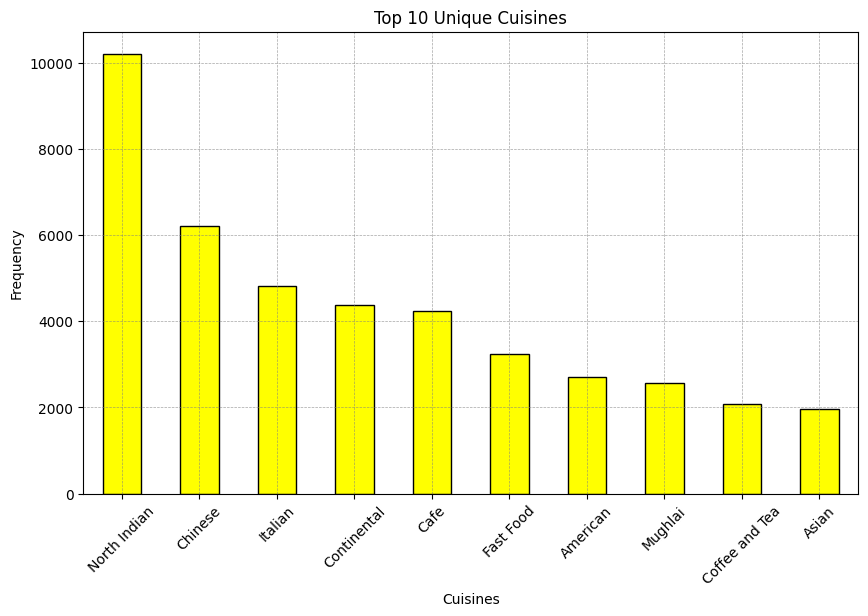

In [140]:
import matplotlib.pyplot as plt

unique_cuisines = final_df['Cuisines'].str.split(',').explode().str.strip()
top_unique_cuisines = unique_cuisines.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_unique_cuisines.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Top 10 Unique Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


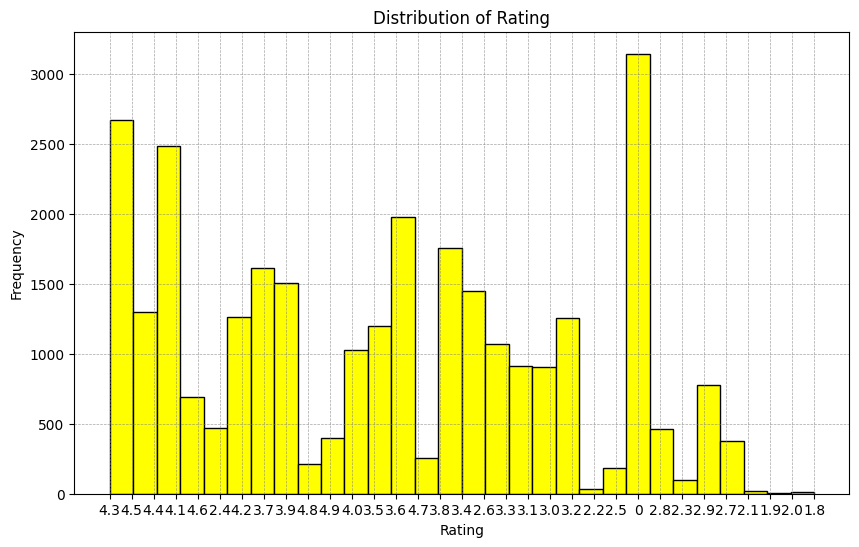

In [141]:
#distribution of rating
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(final_df['Rating'], bins=30, edgecolor='black', color='yellow')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 
plt.show()

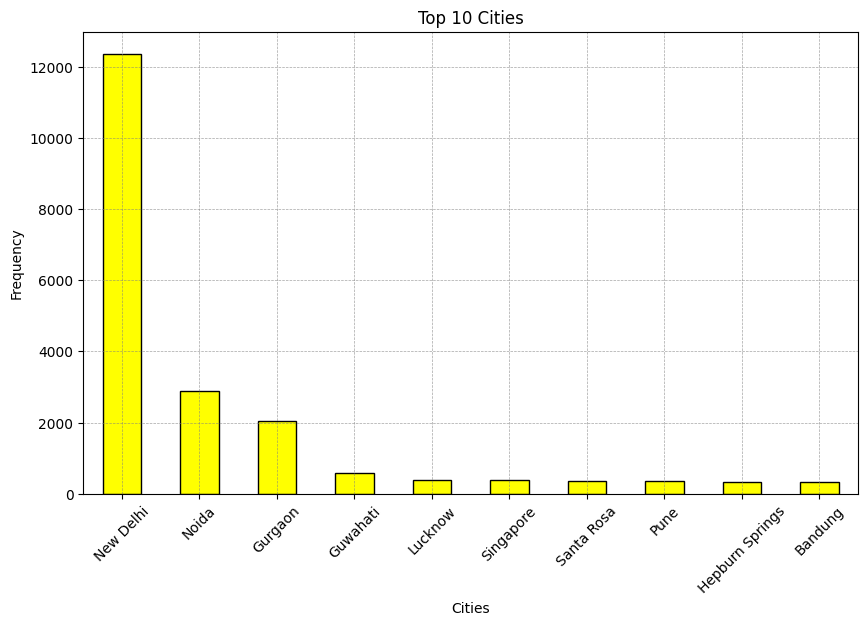

In [142]:
#top 10 cities
import matplotlib.pyplot as plt
import numpy as np

top_cities = final_df['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Top 10 Cities')
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

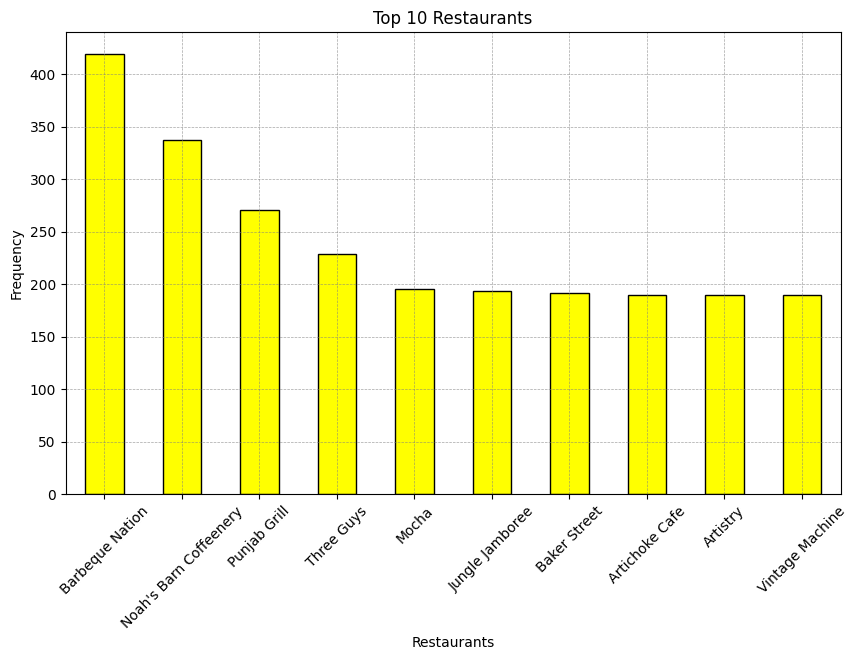

In [155]:
#top 10 restaurants
import matplotlib.pyplot as plt
import numpy as np

top_restaurants = final_df['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_restaurants.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Top 10 Restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Frequency')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [156]:
#check NaN values
final_df.isna().sum()

Name                        0
Cuisines                    0
Average_cost_for_two        0
Price_range                 0
Currency                    0
Url                         0
Address                     0
City                        0
Latitude                    0
Longitude                   0
Rating                      0
Rating_text                 0
Has_online_delivery         0
Photos_url                  0
Apikey                      0
Rating_color                0
Has_table_booking           0
Country_id                  0
City_id                     0
Restaurant_id               0
Average_cost_for_two_usd    0
dtype: int64

In [271]:
Final_df = final_df.copy()

In [22]:
import pandas as pd
Final_df = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\Clustering\Final_df1.csv")

In [23]:
Final_df.columns

Index(['Name', 'Cuisines', 'Average_cost_for_two', 'Price_range', 'Currency',
       'Url', 'Featured_image', 'Address', 'City', 'Latitude', 'Longitude',
       'Rating', 'Rating_text', 'Has_online_delivery', 'Photos_url', 'Apikey',
       'Rating_color', 'Has_table_booking', 'Country_id', 'City_id',
       'Restaurant_id', 'Average_cost_for_two_usd'],
      dtype='object')

In [19]:
import pymysql

connection = pymysql.connect(
    host='database-1.cxeouwsq6n6b.ap-south-1.rds.amazonaws.com',
    user='admin',
    password='20022004Yuvaraj',
    port=3306
)

try:
    print("Connected to RDS successfully!")
    with connection.cursor() as cursor:
        cursor.execute("SHOW DATABASES;")
        databases = cursor.fetchall()
        print("Databases:", databases)
finally:
    connection.close()


Connected to RDS successfully!
Databases: (('information_schema',), ('mysql',), ('performance_schema',), ('sys',))


In [20]:
import pymysql

host = 'database-1.cxeouwsq6n6b.ap-south-1.rds.amazonaws.com'
user = 'admin'
password = '20022004Yuvaraj'
port = 3306

database_to_create = 'Restaurant_df'

connection = pymysql.connect(
    host=host,
    user=user,
    password=password,
    port=port
)

try:
    with connection.cursor() as cursor:
        create_database_query = f"CREATE DATABASE IF NOT EXISTS `{database_to_create}`;"
        cursor.execute(create_database_query)
        connection.commit()
        print(f"Database '{database_to_create}' has been created successfully.")

finally:
    connection.close()


Database 'Restaurant_df' has been created successfully.


In [24]:
import pymysql
import pandas as pd

host = 'database-1.cxeouwsq6n6b.ap-south-1.rds.amazonaws.com'
user = 'admin'
password = '20022004Yuvaraj'
port = 3306

database_to_create = 'Restaurant_df'
table_name = 'Restaurant_info'

csv_file_path = R"C:\Users\navee\OneDrive\Desktop\Clustering\Final_df1.csv"
dataframe = pd.read_csv(csv_file_path)

connection = pymysql.connect(
    host=host,
    user=user,
    password=password,
    port=port
)

try:
    with connection.cursor() as cursor:
        create_database_query = f"CREATE DATABASE IF NOT EXISTS `{database_to_create}`;"
        cursor.execute(create_database_query)
        cursor.execute(f"USE `{database_to_create}`;")
        create_table_query = f"""
        CREATE TABLE IF NOT EXISTS `{table_name}` (
            id INT AUTO_INCREMENT PRIMARY KEY,
            Name VARCHAR(255),
            Cuisines VARCHAR(255),
            Average_cost_for_two FLOAT,
            Price_range INT,
            Currency VARCHAR(50),
            Url TEXT,
            Featured_image TEXT,
            Address TEXT,
            City VARCHAR(100),
            Latitude FLOAT,
            Longitude FLOAT,
            Rating FLOAT,
            Rating_text VARCHAR(255),
            Has_online_delivery BOOLEAN,
            Photos_url TEXT,
            Apikey VARCHAR(255),
            Rating_color VARCHAR(50),
            Has_table_booking BOOLEAN,
            Country_id INT,
            City_id INT,
            Restaurant_id INT,
            Average_cost_for_two_usd FLOAT
        );
        """
        cursor.execute(create_table_query)
        insert_query = f"""
        INSERT INTO `{table_name}` (Name, Cuisines, Average_cost_for_two, Price_range, Currency, Url, Featured_image, Address, City, Latitude, Longitude, Rating, Rating_text, Has_online_delivery, Photos_url, Apikey, Rating_color, Has_table_booking, Country_id, City_id, Restaurant_id, Average_cost_for_two_usd)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        for _, row in dataframe.iterrows():
            cursor.execute(insert_query, (
                row['Name'],
                row['Cuisines'],
                row['Average_cost_for_two'],
                row['Price_range'],
                row['Currency'],
                row['Url'],
                row['Featured_image'],
                row['Address'],
                row['City'],
                row['Latitude'],
                row['Longitude'],
                row['Rating'],
                row['Rating_text'],
                row['Has_online_delivery'],
                row['Photos_url'],
                row['Apikey'],
                row['Rating_color'],
                row['Has_table_booking'],
                row['Country_id'],
                row['City_id'],
                row['Restaurant_id'],
                row['Average_cost_for_two_usd']
            ))
        connection.commit()
        print(f"Data from '{csv_file_path}' has been uploaded to the '{table_name}' table in the '{database_to_create}' database.")

finally:
    connection.close()


Data from 'C:\Users\navee\OneDrive\Desktop\Clustering\Final_df1.csv' has been uploaded to the 'Restaurant_info' table in the 'Restaurant_df' database.


In [25]:
import pymysql
import pandas as pd

host = 'database-1.cxeouwsq6n6b.ap-south-1.rds.amazonaws.com'
user = 'admin'
password = '20022004Yuvaraj'
port = 3306

database_to_use = 'Restaurant_df'
table_name = 'Restaurant_info'

connection = pymysql.connect(
    host=host,
    user=user,
    password=password,
    database=database_to_use,
    port=port
)

try:
    print("Connected to RDS successfully!")
    query = f"SELECT * FROM {table_name};"
    Final_df = pd.read_sql(query, connection)
    
    print(Final_df.head())  
    print(f"DataFrame shape: {Final_df.shape}")

finally:
    connection.close()


Connected to RDS successfully!


C:\Users\navee\AppData\Local\Temp\ipykernel_17584\802728306.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Final_df = pd.read_sql(query, connection)


   id                        Name  \
0   1            Hauz Khas Social   
1   2  Qubitos - The Terrace Cafe   
2   3             The Hudson Cafe   
3   4           Summer House Cafe   
4   5                 38 Barracks   

                                            Cuisines  Average_cost_for_two  \
0         Continental, American, Asian, North Indian                1600.0   
1  Thai, European, Mexican, North Indian, Chinese...                1500.0   
2                Cafe, Italian, Continental, Chinese                 850.0   
3                               Italian, Continental                1850.0   
4             North Indian, Italian, Asian, American                1600.0   

   Price_range       Currency  \
0            3  Indian Rupees   
1            3  Indian Rupees   
2            2  Indian Rupees   
3            3  Indian Rupees   
4            3  Indian Rupees   

                                                 Url  \
0  https://www.zomato.com/HauzKhasSocial?utm_sour... 

In [26]:
Final_df

,id,Name,Cuisines,Average_cost_for_two,Price_range,Currency,Url,Featured_image,Address,City,...,Rating_text,Has_online_delivery,Photos_url,Apikey,Rating_color,Has_table_booking,Country_id,City_id,Restaurant_id,Average_cost_for_two_usd
0,1,Hauz Khas Social,"Continental, American, Asian, North Indian",1600.0,3,Indian Rupees,https://www.zomato.com/HauzKhasSocial?utm_sour...,https://b.zmtcdn.com/data/pictures/2/308322/cf...,"9-A & 12, Hauz Khas Village, New Delhi",New Delhi,...,Very Good,1,https://www.zomato.com/HauzKhasSocial/photos?u...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,308322,18.8947
1,2,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",1500.0,3,Indian Rupees,https://www.zomato.com/ncr/qubitos-the-terrace...,https://b.zmtcdn.com/data/pictures/7/18037817/...,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,...,Excellent,0,https://www.zomato.com/ncr/qubitos-the-terrace...,b90e6a8c738410315a20c449fe2eb1b1,3F7E00,1,1,1,18037817,17.7137
2,3,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",850.0,2,Indian Rupees,https://www.zomato.com/ncr/the-hudson-cafe-del...,https://b.zmtcdn.com/data/pictures/5/312345/03...,"2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,...,Very Good,1,https://www.zomato.com/ncr/the-hudson-cafe-del...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,0,1,1,312345,10.0378
3,4,Summer House Cafe,"Italian, Continental",1850.0,3,Indian Rupees,https://www.zomato.com/ncr/summer-house-cafe-h...,https://b.zmtcdn.com/data/pictures/0/307490/e0...,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,...,Very Good,0,https://www.zomato.com/ncr/summer-house-cafe-h...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,307490,21.8470
4,5,38 Barracks,"North Indian, Italian, Asian, American",1600.0,3,Indian Rupees,https://www.zomato.com/ncr/38-barracks-connaug...,https://b.zmtcdn.com/data/pictures/7/18241537/...,"M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,...,Very Good,0,https://www.zomato.com/ncr/38-barracks-connaug...,b90e6a8c738410315a20c449fe2eb1b1,5BA829,1,1,1,18241537,18.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29523,29524,Rupes Burgers,"Burger, Fast Food",10.0,1,US Dollar,https://www.zomato.com/pocatello-id/rupes-burg...,No_Image_Available,"302 NE Main St, Blackfoot, ID 83221",Pocatello,...,Good,0,https://www.zomato.com/pocatello-id/rupes-burg...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582467,10.0000
29524,29525,Outer Limits Fun Zone,"Burger, Pizza, Sandwich",10.0,1,US Dollar,https://www.zomato.com/pocatello-id/outer-limi...,No_Image_Available,"1800 Garrett Way, Pocatello, ID 83201",Pocatello,...,Good,0,https://www.zomato.com/pocatello-id/outer-limi...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582677,10.0000
29525,29526,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",40.0,3,US Dollar,https://www.zomato.com/pocatello-id/sandpiper-...,No_Image_Available,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,...,Good,0,https://www.zomato.com/pocatello-id/sandpiper-...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582625,40.0000
29526,29527,Texas Roadhouse,"American, BBQ, Steak",45.0,3,US Dollar,https://www.zomato.com/pocatello-id/texas-road...,https://b.zmtcdn.com/data/pictures/chains/8/17...,"560 Bullock Street, Pocatello, ID 83202",Pocatello,...,Good,0,https://www.zomato.com/pocatello-id/texas-road...,b90e6a8c738410315a20c449fe2eb1b1,9ACD32,0,216,667,17582668,45.0000


In [68]:
columns_to_use = ['Cuisines', 'City', 'Average_cost_for_two_usd', 'Rating', 'Price_range']
clustering_data = Final_df[columns_to_use]
clustering_data.fillna(0, inplace=True)

C:\Users\navee\AppData\Local\Temp\ipykernel_16472\3875073524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data.fillna(0, inplace=True)


In [69]:
#check NaN values
clustering_data.isna().sum()

Cuisines                    0
City                        0
Average_cost_for_two_usd    0
Rating                      0
Price_range                 0
dtype: int64

In [70]:
#check unique values
clustering_data.nunique()

Cuisines                    1825
City                         140
Average_cost_for_two_usd     291
Rating                        33
Price_range                    4
dtype: int64

In [60]:
clustering_data

,Cuisines,City,Average_cost_for_two_usd,Rating,Price_range
0,"Continental, American, Asian, North Indian",New Delhi,18.8947,4.3,3
1,"Thai, European, Mexican, North Indian, Chinese...",New Delhi,17.7137,4.5,3
2,"Cafe, Italian, Continental, Chinese",New Delhi,10.0378,4.4,2
3,"Italian, Continental",New Delhi,21.8470,4.1,3
4,"North Indian, Italian, Asian, American",New Delhi,18.8947,4.4,3
...,...,...,...,...,...
29523,"Burger, Fast Food",Pocatello,10.0000,3.7,1
29524,"Burger, Pizza, Sandwich",Pocatello,10.0000,3.5,1
29525,"American, Seafood, Steak",Pocatello,40.0000,3.6,3
29526,"American, BBQ, Steak",Pocatello,45.0000,3.5,3


In [71]:
clustering_data['Cuisines'] = clustering_data['Cuisines'].fillna('Unknown').replace('', 'Unknown')
cuisines_split = clustering_data['Cuisines'].str.split(',')
cuisines_dummies = pd.DataFrame(
    cuisines_split.tolist(), 
    columns=[f'Cuisines_{i+1}' for i in range(cuisines_split.apply(len).max())]
)
cuisines_dummies = pd.get_dummies(cuisines_dummies, dtype=int, prefix='', prefix_sep='')
clustering_data = pd.concat([clustering_data, cuisines_dummies], axis=1)
clustering_data.drop(columns=['Cuisines'], inplace=True)

print(clustering_data.head())


C:\Users\navee\AppData\Local\Temp\ipykernel_16472\1356486037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cuisines'] = clustering_data['Cuisines'].fillna('Unknown').replace('', 'Unknown')


        City  Average_cost_for_two_usd  Rating  Price_range  Afghani  African  \
0  New Delhi                   18.8947     4.3            3        0        0   
1  New Delhi                   17.7137     4.5            3        0        0   
2  New Delhi                   10.0378     4.4            2        0        0   
3  New Delhi                   21.8470     4.1            3        0        0   
4  New Delhi                   18.8947     4.4            3        0        0   

   American  Andhra  Arabian  Argentine  ...   North Indian   Pizza  \
0         0       0        0          0  ...              0       0   
1         0       0        0          0  ...              0       0   
2         0       0        0          0  ...              0       0   
3         0       0        0          0  ...              0       0   
4         0       0        0          0  ...              0       0   

    Rajasthani   Spanish   Thai   Beverages   Finger Food   International  \
0        

In [72]:
#count columns
print(clustering_data.shape)

(29528, 520)


In [73]:
import pickle
with open('encoded_cuisines.pkl', 'wb') as f:
    pickle.dump(cuisines_dummies, f)

In [74]:
import joblib
from sklearn.preprocessing import LabelEncoder

label_encoder_city = LabelEncoder()
clustering_data['City'] = label_encoder_city.fit_transform(clustering_data['City'])


In [75]:
#use pickle to save label encoder

with open('label_encoder_city.pkl', 'wb') as f:
    pickle.dump(label_encoder_city, f)

In [76]:
clustering_data

,City,Average_cost_for_two_usd,Rating,Price_range,Afghani,African,American,Andhra,Arabian,Argentine,...,North Indian,Pizza,Rajasthani,Spanish,Thai,Beverages,Finger Food,International,Mithai,Mughlai
0,87,18.8947,4.3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,87,17.7137,4.5,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87,10.0378,4.4,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,87,21.8470,4.1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,87,18.8947,4.4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29523,100,10.0000,3.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29524,100,10.0000,3.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29525,100,40.0000,3.6,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29526,100,45.0000,3.5,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_data[['Average_cost_for_two_usd', 'Rating', 'Price_range']] = scaler.fit_transform(clustering_data[['Average_cost_for_two_usd', 'Rating', 'Price_range']])

In [78]:
#use pickle to save scaler

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


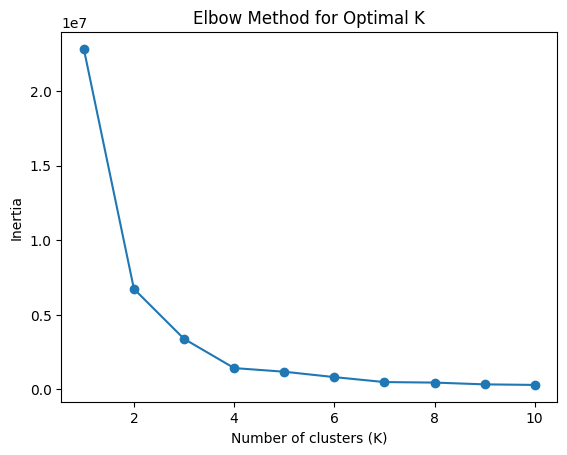

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

Text(0.5, 0, 'Number of clusters (K)')

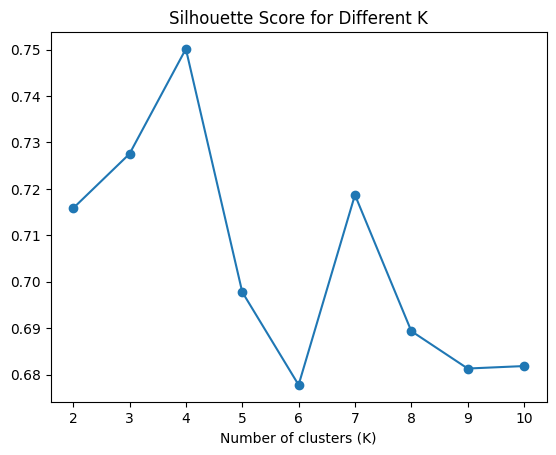

In [ ]:
#silhouette score for each cluster
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    silhouette_scores.append(silhouette_score(clustering_data, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of clusters (K)')

In [81]:
import pickle
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

# 7. Save the trained KMeans model using Pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
    
sil_score = silhouette_score(clustering_data, clustering_data['Cluster'])

print(f'Silhouette Score for K = 4: {sil_score}')

Silhouette Score for K = 4: 0.750641905116833


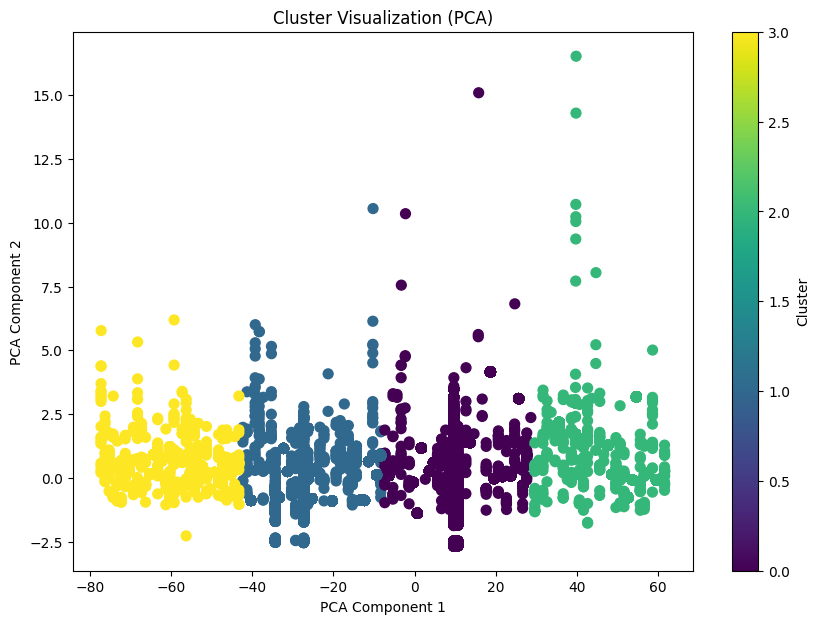

In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(clustering_data.drop(columns=['Cluster']))
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clustering_data['Cluster'], cmap='viridis', s=50)

plt.colorbar(scatter, label='Cluster')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

c:\Users\navee\OneDrive\Desktop\Clustering\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


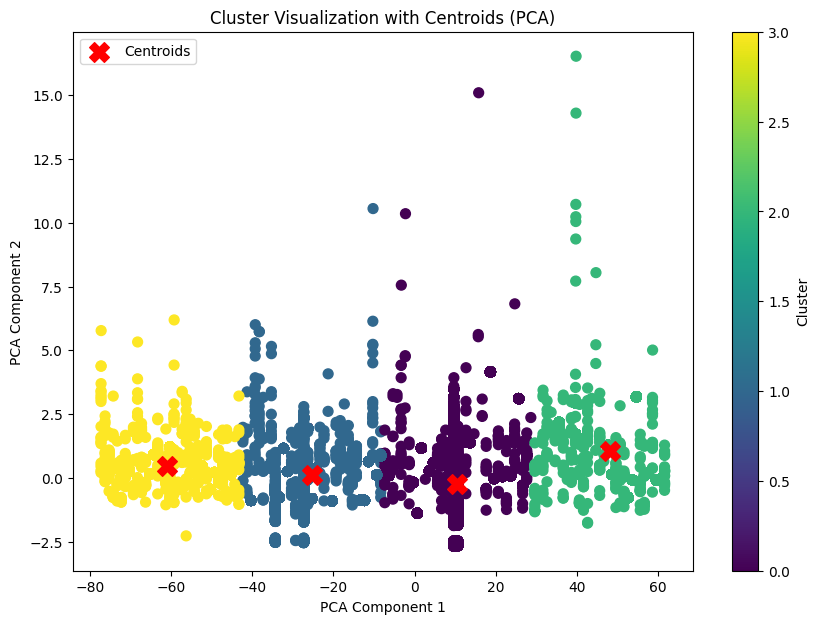

In [84]:
centroids = kmeans.cluster_centers_
pca_centroids = pca.transform(centroids)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clustering_data['Cluster'], cmap='viridis', s=50)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')  # Centroids

plt.colorbar(scatter, label='Cluster')
plt.title('Cluster Visualization with Centroids (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

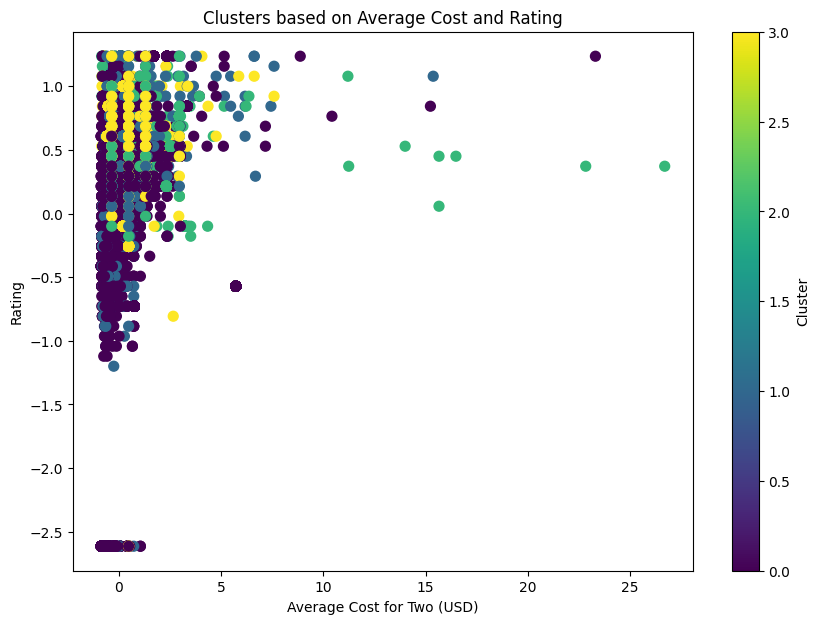

In [85]:
plt.figure(figsize=(10, 7))
plt.scatter(clustering_data['Average_cost_for_two_usd'], clustering_data['Rating'], 
            c=clustering_data['Cluster'], cmap='viridis', s=50)

plt.title('Clusters based on Average Cost and Rating')
plt.xlabel('Average Cost for Two (USD)')
plt.ylabel('Rating')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
centroid_values = kmeans.cluster_centers_
import pandas as pd

centroid_df = pd.DataFrame(centroid_values, columns=clustering_data.drop(columns=['Cluster']).columns)
print("Centroid Values:")
print(centroid_df)

Centroid Values:
         City  Average_cost_for_two_usd    Rating  Price_range       Afghani  \
0   87.831120                 -0.128607 -0.201001    -0.057899  2.732688e-04   
1   52.085686                 -0.125708  0.242562    -0.017617  4.896360e-04   
2  125.428116                  1.222700  0.398630     0.444941 -2.710505e-18   
3   16.346317                  0.020491  0.459151     0.019312 -2.764716e-18   

        African  American        Andhra   Arabian     Argentine  ...  \
0  5.465377e-05  0.049352  5.465377e-05  0.000164  5.465377e-05  ...   
1 -9.893345e-19  0.010282  1.463673e-18  0.000163 -4.946672e-19  ...   
2  3.982477e-04  0.091597  7.964954e-04  0.000398 -3.388132e-19  ...   
3 -6.911789e-19  0.082916 -1.490778e-19  0.000386 -3.455894e-19  ...   

    North Indian         Pizza    Rajasthani       Spanish          Thai  \
0   5.465377e-05  1.093075e-04  2.120970e-18  5.465377e-05  2.120970e-18   
1  -4.946672e-19 -9.893345e-19  1.632120e-04 -4.946672e-19 -4.946672e

In [89]:
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=clustering_data.drop(columns=['Cluster']).columns)

print("Centroid Values for Each Cluster:")
print(centroid_df)
feature_variation = centroid_df.max() - centroid_df.min()
print("\nFeature Variation Across Clusters:")
print(feature_variation.sort_values(ascending=False))


Centroid Values for Each Cluster:
         City  Average_cost_for_two_usd    Rating  Price_range       Afghani  \
0   87.831120                 -0.128607 -0.201001    -0.057899  2.732688e-04   
1   52.085686                 -0.125708  0.242562    -0.017617  4.896360e-04   
2  125.428116                  1.222700  0.398630     0.444941 -2.710505e-18   
3   16.346317                  0.020491  0.459151     0.019312 -2.764716e-18   

        African  American        Andhra   Arabian     Argentine  ...  \
0  5.465377e-05  0.049352  5.465377e-05  0.000164  5.465377e-05  ...   
1 -9.893345e-19  0.010282  1.463673e-18  0.000163 -4.946672e-19  ...   
2  3.982477e-04  0.091597  7.964954e-04  0.000398 -3.388132e-19  ...   
3 -6.911789e-19  0.082916 -1.490778e-19  0.000386 -3.455894e-19  ...   

    North Indian         Pizza    Rajasthani       Spanish          Thai  \
0   5.465377e-05  1.093075e-04  2.120970e-18  5.465377e-05  2.120970e-18   
1  -4.946672e-19 -9.893345e-19  1.632120e-04 -4.9466

Key Takeaways:
Cluster 2: Represents high-end restaurants with higher costs and mid-to-high ratings.
Cluster 3: Has the best-rated restaurants but is slightly more mid-range in cost.
Cluster 0 and Cluster 1: Represent lower-cost options with varying ratings and price ranges.

Cluster 0:
Low-cost restaurants with diverse cuisine offerings.
Lower ratings and price range.
Associated with mid-range cities geographically.
Cluster 1:
Slightly better ratings than Cluster 0 but still low-cost.
Fewer specialized cuisines.
Associated with specific city groups.
Cluster 2:
High-cost restaurants with mid-to-high ratings.
Stronger presence of specific cuisines like American.
Represents premium, high-end dining.
Cluster 3:
Best-rated restaurants with mid-range costs.
Specialized cuisines like Thai and Mithai.
Associated with specific cities with lower city codes.

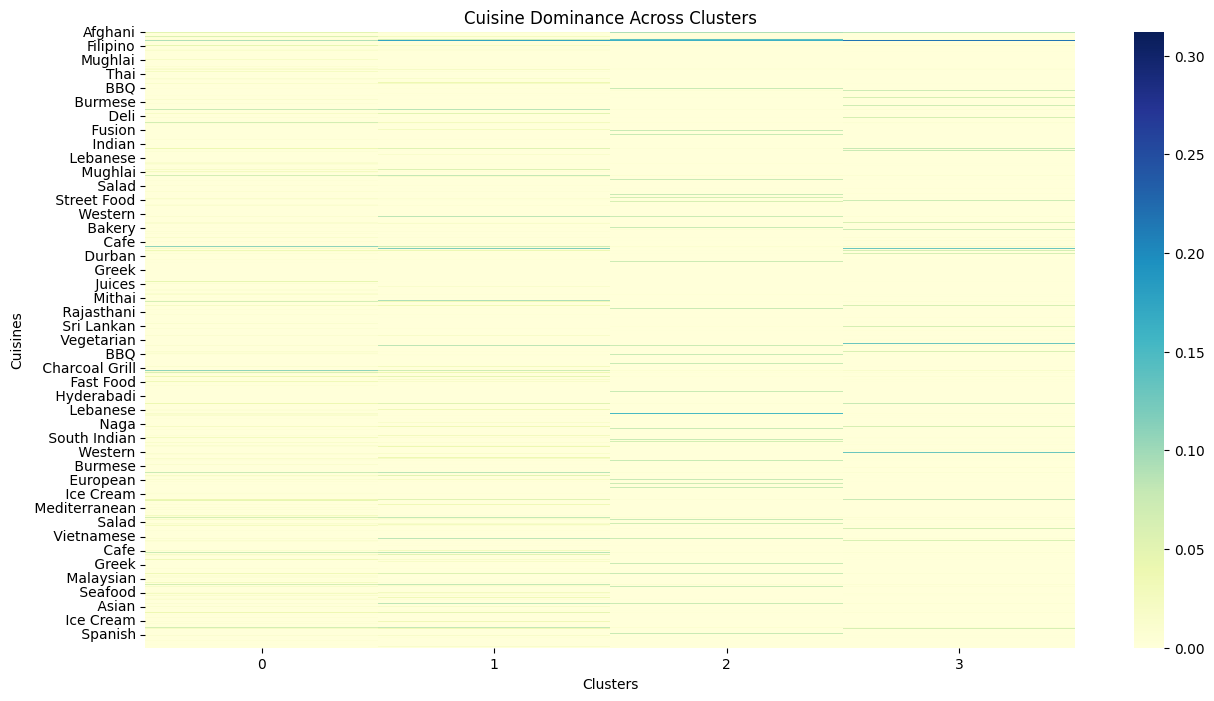

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'centroid_values' is the array of centroids and 'clustering_data' is your DataFrame
centroid_df = pd.DataFrame(centroid_values, columns=clustering_data.drop(columns=['Cluster']).columns)

# Extract only the cuisine columns
cuisine_columns = [col for col in centroid_df.columns if col not in ['City', 'Average_cost_for_two_usd', 'Rating', 'Price_range']]
cuisine_centroids = centroid_df[cuisine_columns]

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(cuisine_centroids.T, annot=False, cmap="YlGnBu", cbar=True)
plt.title("Cuisine Dominance Across Clusters")
plt.xlabel("Clusters")
plt.ylabel("Cuisines")
plt.show()


Observations:
Cluster-Wise Dominance:

The darker colors represent a higher presence of a cuisine in a specific cluster.
Some clusters have strong dominance for specific cuisines, while others have lighter, more distributed values.
Cuisine Variability:

Certain cuisines like Mithai, Thai, and North Indian may have higher contributions in one or more clusters, while others are evenly distributed or minimal.
Cluster Highlights:

Cluster 0: Shows significant representation of multiple cuisines, suggesting a diverse range of offerings.
Cluster 2: Likely has dominance for more niche cuisines based on darker heatmap values.
Cluster 3: Indicates specialized cuisines, potentially catering to premium or specific audience groups.

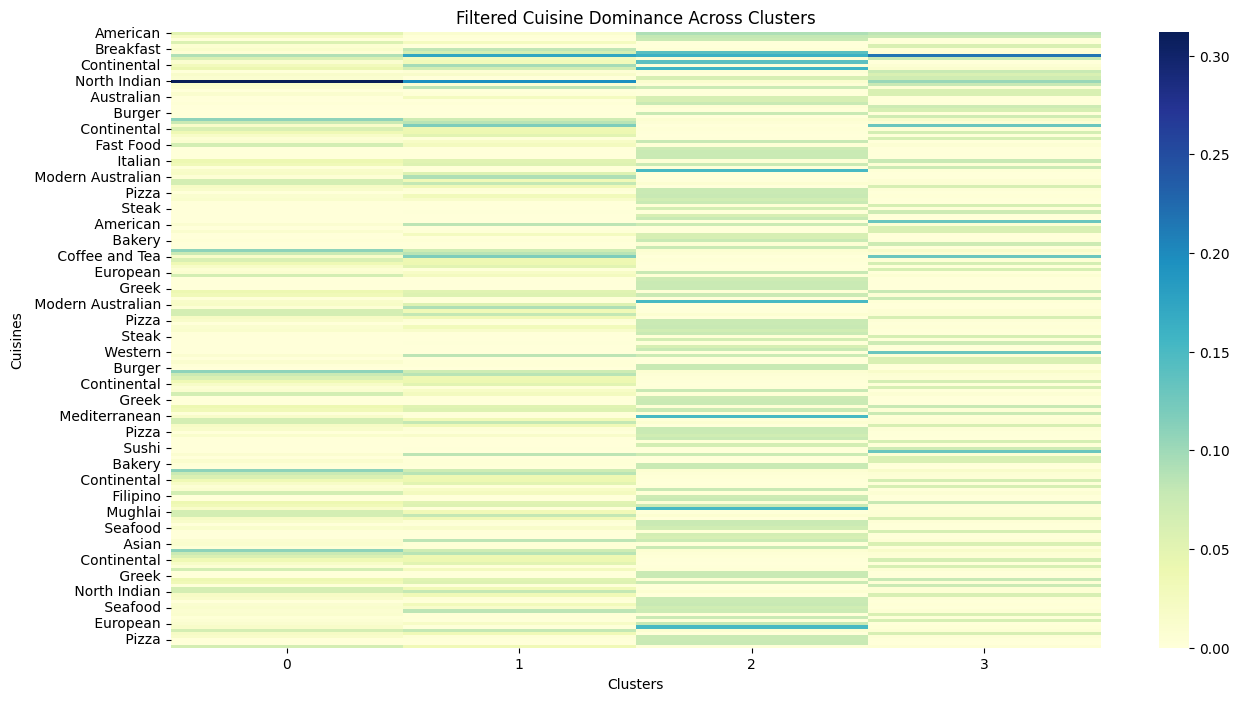

In [146]:
filtered_cuisines = cuisine_centroids.loc[:, (cuisine_centroids.max() > 0.05)] 

plt.figure(figsize=(15, 8))
sns.heatmap(filtered_cuisines.T, annot=False, cmap="YlGnBu", cbar=True)
plt.title("Filtered Cuisine Dominance Across Clusters")
plt.xlabel("Clusters")
plt.ylabel("Cuisines")
plt.show()

City-wise Distribution of Clusters:
City     0    1    2    3    4    5    6    7    8    9    10   11   12   13   \
Cluster                                                                         
0          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         20   17  202   16   19  202   20  155   20   20   20   20  182  337   

City     14   15   16   17   18   19   20   21   22   23   24   25   26   27   \
Cluster                                                                         
0          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2          0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         20  182   20  175   20    2   20   20   20   20   18  182   20

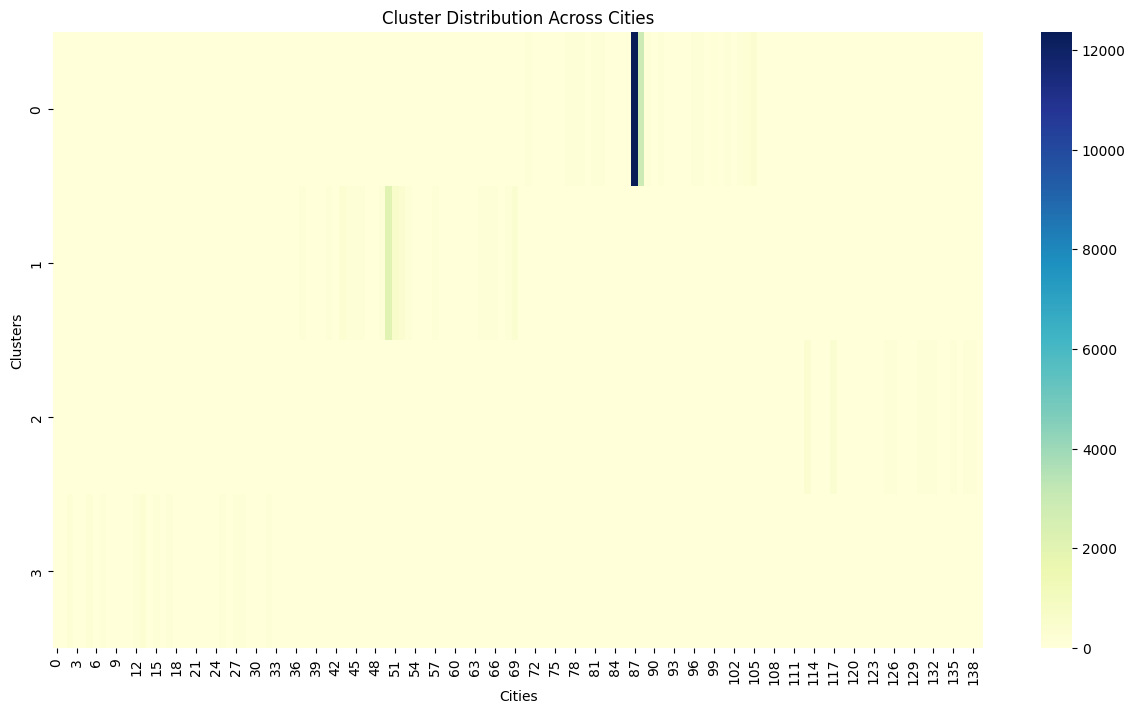

In [149]:

city_cluster_distribution = clustering_data.groupby(['Cluster', 'City']).size().unstack(fill_value=0)
print("City-wise Distribution of Clusters:")
print(city_cluster_distribution)

plt.figure(figsize=(15, 8))
sns.heatmap(city_cluster_distribution, cmap="YlGnBu", cbar=True)
plt.title("Cluster Distribution Across Cities")
plt.xlabel("Cities")
plt.ylabel("Clusters")
plt.show()


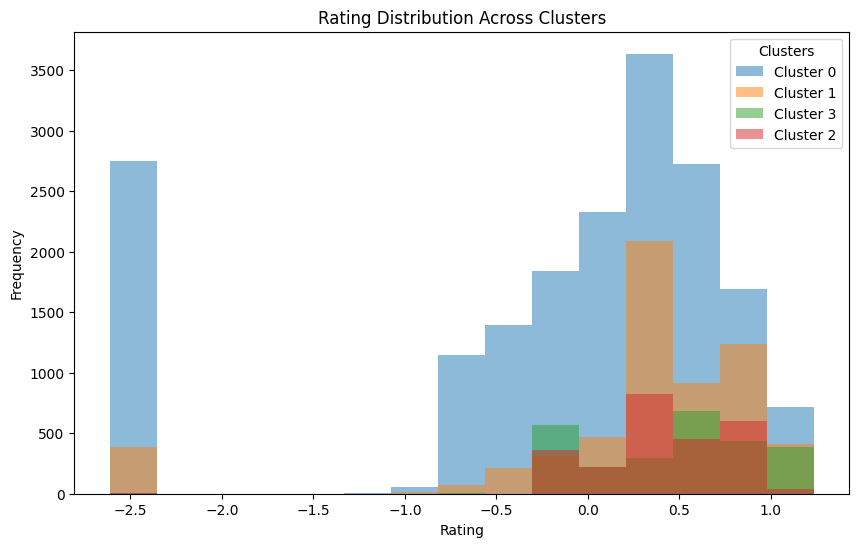

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in clustering_data['Cluster'].unique():
    subset = clustering_data[clustering_data['Cluster'] == cluster]
    plt.hist(subset['Rating'], bins=15, alpha=0.5, label=f"Cluster {cluster}")

plt.title("Rating Distribution Across Clusters")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend(title="Clusters")
plt.show()